# Power grid example case 39: New England Noisy version


$\Gamma = 0$,

__case-39 New England__

Node configuration: 10 Generators + 10 Terminals + 29 Loads

Perburbations = large

Splitting time-series according to perturbation points

$\Gamma = 0$,

Perburbations = large

Splitting time-series according to perturbation points

In [1]:
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import warnings
pd.set_option('display.float_format', '{:0.8f}'.format)
import operator

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.sparse import coo_array

from os import path

## Loading data

In [2]:
#Name of the folder with the time series and other files
# folder_name_1 = "case39bus9gen_halfperturb"
folder_name_1 = "case39bus10gen_onetenthperturb"
# folder_name_1 = "case_39bus10gen_newengland"

#Name that needs to be appending to the beginning of other files
folder_name = "case_39bus10gen_newengland"
folder_location = path.join("powergrid","Datasets", folder_name_1)

data_matrix_df_1 = pd.read_csv(path.join(folder_location, "{}_trimmed_time_series.csv".format(folder_name)))

data_matrix_df_2 = pd.read_csv(path.join(folder_location, "{}_trimmed_time_series.csv".format(folder_name)))

data_matrix_df_3 = pd.read_csv(path.join(folder_location, "{}_trimmed_time_series.csv".format(folder_name)))

#### Reading time series data and skipping rows to sub sample

In [3]:
# #Trimming original time series to reduce the number of data points
# data_matrix_df_orig = pd.read_csv(path.join(folder_location, "{}_timeseries.csv".format(folder_name)))
# skip_n_rows_btw = 10
# rows_to_keep = np.arange(0, len(data_matrix_df_orig), skip_n_rows_btw)

# data_matrix_df = data_matrix_df_orig.iloc[rows_to_keep].reset_index(drop=True)

# data_matrix_df.to_csv(path.join(folder_location, "{}_trimmed_time_series.csv".format(folder_name)), index=False)

In [4]:
data_matrix_df = pd.read_csv(path.join(folder_location, "{}_trimmed_time_series.csv".format(folder_name)))

In [5]:
data_matrix_df

,time,PhaseGen1,PhaseGen2,PhaseGen3,PhaseGen4,PhaseGen5,PhaseGen6,PhaseGen7,PhaseGen8,PhaseGen9,...,ReactivePowerLoad20,ReactivePowerLoad21,ReactivePowerLoad22,ReactivePowerLoad23,ReactivePowerLoad24,ReactivePowerLoad25,ReactivePowerLoad26,ReactivePowerLoad27,ReactivePowerLoad28,ReactivePowerLoad29
0,0.00000000,-0.10549836,0.00000000,0.01107847,0.01988585,-0.00398084,0.05276848,0.09987475,-0.00809098,0.09006077,...,-1.28326173,-1.45722942,-0.41494594,-1.22979590,0.71957610,-0.82294700,-0.36920976,-0.79869356,-0.40498421,-0.69750703
1,0.01000000,-0.10269486,0.00215632,0.01326875,0.02181531,-0.00210533,0.05458524,0.10150276,-0.00600223,0.09160471,...,-1.13479435,-1.34787476,-0.35551717,-1.22114607,0.78925001,-0.74121688,-0.31949483,-0.78765625,-0.36882503,-0.72551123
2,0.02000000,-0.09545429,0.00756360,0.01893926,0.02631647,0.00208856,0.05897073,0.10529431,-0.00095893,0.09519037,...,-1.09853970,-1.27376111,-0.22432134,-1.08473695,0.83813276,-0.65538668,-0.26850958,-0.77711736,-0.33502783,-0.55410787
3,0.03000000,-0.08564310,0.01493089,0.02676667,0.03221558,0.00748273,0.06476093,0.11028691,0.00573889,0.09989000,...,-1.07335208,-1.21943073,-0.12427744,-0.98535638,0.87399136,-0.58778687,-0.22853211,-0.76852802,-0.30987653,-0.42982772
4,0.04000000,-0.07445209,0.02340240,0.03579735,0.03885866,0.01351362,0.07122609,0.11589825,0.01331926,0.10514830,...,-1.05596633,-1.18246469,-0.05519915,-0.91883462,0.89833953,-0.53964158,-0.20072695,-0.76236011,-0.29308620,-0.34813670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,199.95010000,0.05143231,0.13798170,0.15631919,0.14898272,0.13486574,0.17913530,0.23695931,0.12220124,0.24736833,...,-1.03032666,-1.14752222,-0.00271386,-0.83018651,0.92537550,-0.51300365,-0.12812333,-0.74838118,-0.25277601,-0.18925940
19997,199.96010000,0.05232418,0.12928616,0.16212899,0.15303850,0.13571470,0.17614157,0.23907632,0.12359848,0.24409428,...,-1.03099750,-1.15109682,-0.01225352,-0.82480788,0.92446754,-0.51034626,-0.13320255,-0.74912374,-0.25569992,-0.19983317
19998,199.97010000,0.05329665,0.12095499,0.16776409,0.15716204,0.13655906,0.17328445,0.24104310,0.12522153,0.24068328,...,-1.03171437,-1.15461384,-0.02136197,-0.81985620,0.92350813,-0.50713789,-0.13844742,-0.74988147,-0.25873729,-0.21081201
19999,199.98010000,0.05433325,0.11310100,0.17313922,0.16129699,0.13740868,0.17061894,0.24282692,0.12704366,0.23716653,...,-1.03244773,-1.15801172,-0.02989246,-0.81543891,0.92251424,-0.50341932,-0.14379604,-0.75064752,-0.26185370,-0.22207950


In [6]:
def get_node_index(label):
    if len(label) >0 and label[-1].isnumeric():
        return get_node_index(label[:-1]) + label[-1]
    else:
        return ""

def node_label_changer(column_label):
    node_index = get_node_index(column_label)
    if "PhaseGenTerm" in column_label:
        new_label = "Phi_T_{}".format(node_index)
    elif "PhaseGen" in column_label:
        new_label = "Phi_G_{}".format(node_index)
    elif "PhaseLoad" in column_label:
        new_label = "Phi_L_{}".format(node_index)
    elif "FreqGenTerm" in column_label:
        new_label = "om_T_{}".format(node_index)
    elif "FreqGen" in column_label:
        new_label = "om_G_{}".format(node_index)
    elif "FreqLoad" in column_label:
        new_label = "om_L_{}".format(node_index)
    elif "ActivePowerGenTerm" in column_label:
        new_label = "P_T_{}".format(node_index)
    elif "ActivePowerGen" in column_label:
        new_label = "P_G_{}".format(node_index)
    elif "ActivePowerLoad" in column_label:
        new_label = "P_L_{}".format(node_index)
    elif "ReactivePowerGenTerm" in column_label:
        new_label = "Q_T_{}".format(node_index)
    elif "ReactivePowerGen" in column_label:
        new_label = "Q_G_{}".format(node_index)
    elif "ReactivePowerLoad" in column_label:
        new_label = "Q_L_{}".format(node_index)
    else:
        new_label = column_label
    return new_label

In [7]:
column_label_dict = {column: node_label_changer(column) for column in data_matrix_df.columns}
column_label_dict

{'time': 'time',
 'PhaseGen1': 'Phi_G_1',
 'PhaseGen2': 'Phi_G_2',
 'PhaseGen3': 'Phi_G_3',
 'PhaseGen4': 'Phi_G_4',
 'PhaseGen5': 'Phi_G_5',
 'PhaseGen6': 'Phi_G_6',
 'PhaseGen7': 'Phi_G_7',
 'PhaseGen8': 'Phi_G_8',
 'PhaseGen9': 'Phi_G_9',
 'PhaseGen10': 'Phi_G_10',
 'PhaseGenTerm1': 'Phi_T_1',
 'PhaseGenTerm2': 'Phi_T_2',
 'PhaseGenTerm3': 'Phi_T_3',
 'PhaseGenTerm4': 'Phi_T_4',
 'PhaseGenTerm5': 'Phi_T_5',
 'PhaseGenTerm6': 'Phi_T_6',
 'PhaseGenTerm7': 'Phi_T_7',
 'PhaseGenTerm8': 'Phi_T_8',
 'PhaseGenTerm9': 'Phi_T_9',
 'PhaseGenTerm10': 'Phi_T_10',
 'PhaseLoad1': 'Phi_L_1',
 'PhaseLoad2': 'Phi_L_2',
 'PhaseLoad3': 'Phi_L_3',
 'PhaseLoad4': 'Phi_L_4',
 'PhaseLoad5': 'Phi_L_5',
 'PhaseLoad6': 'Phi_L_6',
 'PhaseLoad7': 'Phi_L_7',
 'PhaseLoad8': 'Phi_L_8',
 'PhaseLoad9': 'Phi_L_9',
 'PhaseLoad10': 'Phi_L_10',
 'PhaseLoad11': 'Phi_L_11',
 'PhaseLoad12': 'Phi_L_12',
 'PhaseLoad13': 'Phi_L_13',
 'PhaseLoad14': 'Phi_L_14',
 'PhaseLoad15': 'Phi_L_15',
 'PhaseLoad16': 'Phi_L_16',
 'PhaseLo

In [8]:
# new_column_names = ["time", "Phi_0", "Phi_1", "Phi_2", "Phi_3", "Phi_4", "Phi_5",
#                    "om_0", "om_1", "om_2", "om_3","om_4", "om_5", "P_0", "P_1", "P_2", "P_3", "P_4", "P_5",
#                    "Q_0", "Q_1", "Q_2", "Q_3", "Q_4", "Q_5"]

#Renaming the state variables for compactness
data_matrix_df.rename(columns= column_label_dict, inplace=True)

In [9]:
power_features = [feature for feature in data_matrix_df.columns if "P_" in feature]
freq_features = [feature for feature in data_matrix_df.columns if "om_" in feature]
phase_features = [feature for feature in data_matrix_df.columns if "Phi_" in feature]

K_features = [feature[2:] for feature in power_features]

In [10]:
#Removing Reactive power from the timeseries they are not needed for fitting 
non_reactive_columns = [column for column in data_matrix_df.columns if "Q" not in column]

data_matrix_df = data_matrix_df[non_reactive_columns]

In [11]:
data_matrix_df

,time,Phi_G_1,Phi_G_2,Phi_G_3,Phi_G_4,Phi_G_5,Phi_G_6,Phi_G_7,Phi_G_8,Phi_G_9,...,P_L_20,P_L_21,P_L_22,P_L_23,P_L_24,P_L_25,P_L_26,P_L_27,P_L_28,P_L_29
0,0.00000000,-0.10549836,0.00000000,0.01107847,0.01988585,-0.00398084,0.05276848,0.09987475,-0.00809098,0.09006077,...,0.22086020,-0.00000000,-3.96777289,-4.07945764,-0.00000000,0.36808880,-0.00000000,-0.00000000,-0.00000000,-6.07894876
1,0.01000000,-0.10269486,0.00215632,0.01326875,0.02181531,-0.00210533,0.05458524,0.10150276,-0.00600223,0.09160471,...,-6.05362283,-1.78950513,0.72158895,-1.75014630,-2.01174773,-1.25994248,-0.29974895,-1.60082364,-1.21946664,-2.15275272
2,0.02000000,-0.09545429,0.00756360,0.01893926,0.02631647,0.00208856,0.05897073,0.10529431,-0.00095893,0.09519037,...,-6.46513648,-2.19256577,0.41051424,-2.06218877,-2.46739982,-1.71408226,-0.77464965,-2.11973911,-1.58200928,-2.45290647
3,0.03000000,-0.08564310,0.01493089,0.02676667,0.03221558,0.00748273,0.06476093,0.11028691,0.00573889,0.09989000,...,-6.64110690,-2.44216297,0.21364137,-2.25946849,-2.74421317,-1.96628110,-1.05683700,-2.42941579,-1.80814162,-2.64030250
4,0.04000000,-0.07445209,0.02340240,0.03579735,0.03885866,0.01351362,0.07122609,0.11589825,0.01331926,0.10514830,...,-6.74056793,-2.59414682,0.09422814,-2.37922590,-2.91307731,-2.11443679,-1.22486568,-2.61522831,-1.94284544,-2.75174648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,199.95010000,0.05143231,0.13798170,0.15631919,0.14898272,0.13486574,0.17913530,0.23695931,0.12220124,0.24736833,...,-6.81693585,-2.73923943,0.00581986,-2.47546766,-3.08964402,-2.24391869,-1.38403852,-2.80765186,-2.04098698,-2.81163130
19997,199.96010000,0.05232418,0.12928616,0.16212899,0.15303850,0.13571470,0.17614157,0.23907632,0.12359848,0.24409428,...,-6.81735566,-2.73952155,0.00552985,-2.47548983,-3.08989166,-2.24455001,-1.38391906,-2.80768924,-2.04006346,-2.81048131
19998,199.97010000,0.05329665,0.12095499,0.16776409,0.15716204,0.13655906,0.17328445,0.24104310,0.12522153,0.24068328,...,-6.81764825,-2.73985845,0.00509410,-2.47554724,-3.09011511,-2.24509109,-1.38383615,-2.80773577,-2.03931331,-2.80954911
19999,199.98010000,0.05433325,0.11310100,0.17313922,0.16129699,0.13740868,0.17061894,0.24282692,0.12704366,0.23716653,...,-6.81781530,-2.74024526,0.00452072,-2.47564015,-3.09031276,-2.24553414,-1.38378802,-2.80778948,-2.03873964,-2.80883910


In [12]:
final_time = 199.99

In [13]:
data_matrix_df = data_matrix_df[data_matrix_df["time"] <= final_time]

data_matrix_df[phase_features].plot()

In [14]:
data_matrix_df

,time,Phi_G_1,Phi_G_2,Phi_G_3,Phi_G_4,Phi_G_5,Phi_G_6,Phi_G_7,Phi_G_8,Phi_G_9,...,P_L_20,P_L_21,P_L_22,P_L_23,P_L_24,P_L_25,P_L_26,P_L_27,P_L_28,P_L_29
0,0.00000000,-0.10549836,0.00000000,0.01107847,0.01988585,-0.00398084,0.05276848,0.09987475,-0.00809098,0.09006077,...,0.22086020,-0.00000000,-3.96777289,-4.07945764,-0.00000000,0.36808880,-0.00000000,-0.00000000,-0.00000000,-6.07894876
1,0.01000000,-0.10269486,0.00215632,0.01326875,0.02181531,-0.00210533,0.05458524,0.10150276,-0.00600223,0.09160471,...,-6.05362283,-1.78950513,0.72158895,-1.75014630,-2.01174773,-1.25994248,-0.29974895,-1.60082364,-1.21946664,-2.15275272
2,0.02000000,-0.09545429,0.00756360,0.01893926,0.02631647,0.00208856,0.05897073,0.10529431,-0.00095893,0.09519037,...,-6.46513648,-2.19256577,0.41051424,-2.06218877,-2.46739982,-1.71408226,-0.77464965,-2.11973911,-1.58200928,-2.45290647
3,0.03000000,-0.08564310,0.01493089,0.02676667,0.03221558,0.00748273,0.06476093,0.11028691,0.00573889,0.09989000,...,-6.64110690,-2.44216297,0.21364137,-2.25946849,-2.74421317,-1.96628110,-1.05683700,-2.42941579,-1.80814162,-2.64030250
4,0.04000000,-0.07445209,0.02340240,0.03579735,0.03885866,0.01351362,0.07122609,0.11589825,0.01331926,0.10514830,...,-6.74056793,-2.59414682,0.09422814,-2.37922590,-2.91307731,-2.11443679,-1.22486568,-2.61522831,-1.94284544,-2.75174648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,199.94010000,0.05063664,0.14692228,0.15042412,0.14505107,0.13400288,0.18220743,0.23472809,0.12105350,0.25047507,...,-6.81638769,-2.73901560,0.00595891,-2.47547956,-3.08937381,-2.24320643,-1.38419618,-2.80762567,-2.04207930,-2.81299276
19996,199.95010000,0.05143231,0.13798170,0.15631919,0.14898272,0.13486574,0.17913530,0.23695931,0.12220124,0.24736833,...,-6.81693585,-2.73923943,0.00581986,-2.47546766,-3.08964402,-2.24391869,-1.38403852,-2.80765186,-2.04098698,-2.81163130
19997,199.96010000,0.05232418,0.12928616,0.16212899,0.15303850,0.13571470,0.17614157,0.23907632,0.12359848,0.24409428,...,-6.81735566,-2.73952155,0.00552985,-2.47548983,-3.08989166,-2.24455001,-1.38391906,-2.80768924,-2.04006346,-2.81048131
19998,199.97010000,0.05329665,0.12095499,0.16776409,0.15716204,0.13655906,0.17328445,0.24104310,0.12522153,0.24068328,...,-6.81764825,-2.73985845,0.00509410,-2.47554724,-3.09011511,-2.24509109,-1.38383615,-2.80773577,-2.03931331,-2.80954911


<Axes: >

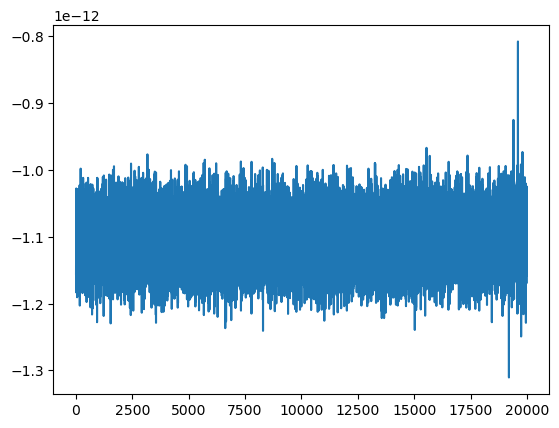

In [15]:
data_matrix_df[power_features].sum(axis=1).plot()

### Reading gamma values 

In [16]:
gamma_df = pd.read_csv(path.join(folder_location, "{}_gamma.csv".format(folder_name)), names=K_features)

In [17]:
gamma_df

,G_1,G_2,G_3,G_4,G_5,G_6,G_7,G_8,G_9,G_10,...,L_20,L_21,L_22,L_23,L_24,L_25,L_26,L_27,L_28,L_29
0,-3.14160000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
1,0.00000000,-3.14160000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
2,0.00000000,0.00000000,-3.14160000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
3,0.00000000,0.00000000,0.00000000,-3.14160000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
4,0.00000000,0.00000000,0.00000000,0.00000000,-3.14160000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
5,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-3.14160000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
6,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-3.14160000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
7,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-3.14160000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
8,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-3.14160000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
9,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-3.14160000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000


### Splitting the time-series with respect to the perturbation points

In [18]:
#Getting perturbations time points
perturbation_points_df = pd.read_csv(path.join(folder_location, "{}_timepoints.csv".format(folder_name)))

perturbation_points_df = perturbation_points_df[perturbation_points_df["Perturbation timepoints"] <= final_time]

In [19]:
perturbation_time_point_list = perturbation_points_df["Perturbation timepoints"]
# perturbation_time_point_list

In [20]:
perturbation_time_point_list

0       0
1       2
2       4
3       6
4       8
     ... 
95    190
96    192
97    194
98    196
99    198
Name: Perturbation timepoints, Length: 100, dtype: int64

In [21]:
#Splitting the data_matrix with the timeseries into a list of timeseries dataframes based on where the perturbation is introduced
#The purpose of this step is to smoothen each of perturbation segment independently using splines and find the derivaties
#This will avoid jumps in the derivative due to the discontinuity at the perturbanc time point

data_matrix_df_list =[data_matrix_df[(ind_i < data_matrix_df["time"]) & (data_matrix_df["time"] < ind_j) ] 
                       for ind_i, ind_j in zip(perturbation_time_point_list[:-1], perturbation_time_point_list[1:])]


data_matrix_df_appended = pd.concat(data_matrix_df_list, ignore_index=True)

data_matrix_df_appended

,time,Phi_G_1,Phi_G_2,Phi_G_3,Phi_G_4,Phi_G_5,Phi_G_6,Phi_G_7,Phi_G_8,Phi_G_9,...,P_L_20,P_L_21,P_L_22,P_L_23,P_L_24,P_L_25,P_L_26,P_L_27,P_L_28,P_L_29
0,0.01000000,-0.10269486,0.00215632,0.01326875,0.02181531,-0.00210533,0.05458524,0.10150276,-0.00600223,0.09160471,...,-6.05362283,-1.78950513,0.72158895,-1.75014630,-2.01174773,-1.25994248,-0.29974895,-1.60082364,-1.21946664,-2.15275272
1,0.02000000,-0.09545429,0.00756360,0.01893926,0.02631647,0.00208856,0.05897073,0.10529431,-0.00095893,0.09519037,...,-6.46513648,-2.19256577,0.41051424,-2.06218877,-2.46739982,-1.71408226,-0.77464965,-2.11973911,-1.58200928,-2.45290647
2,0.03000000,-0.08564310,0.01493089,0.02676667,0.03221558,0.00748273,0.06476093,0.11028691,0.00573889,0.09989000,...,-6.64110690,-2.44216297,0.21364137,-2.25946849,-2.74421317,-1.96628110,-1.05683700,-2.42941579,-1.80814162,-2.64030250
3,0.04000000,-0.07445209,0.02340240,0.03579735,0.03885866,0.01351362,0.07122609,0.11589825,0.01331926,0.10514830,...,-6.74056793,-2.59414682,0.09422814,-2.37922590,-2.91307731,-2.11443679,-1.22486568,-2.61522831,-1.94284544,-2.75174648
4,0.05000000,-0.06264417,0.03242103,0.04540097,0.04585013,0.01985153,0.07791918,0.12177769,0.02131276,0.11063587,...,-6.80022460,-2.68710767,0.02183911,-2.45191240,-3.01684549,-2.20421234,-1.32654455,-2.72836592,-2.02339011,-2.81811867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19794,197.95020000,0.01028516,0.09407741,0.11528395,0.13681551,0.09009141,0.12624813,0.18645529,0.06954484,0.17462327,...,-6.78963430,-2.74022667,-0.00009655,-2.48065236,-3.08715002,-2.24539224,-1.38921930,-2.80989548,-2.05366404,-2.82690421
19795,197.96020000,0.00985444,0.09353052,0.11878007,0.13586816,0.08849436,0.12486339,0.18953431,0.07223302,0.17344593,...,-6.78977321,-2.74047067,-0.00063049,-2.48085549,-3.08715041,-2.24605708,-1.38948508,-2.81006488,-2.05378557,-2.82698859
19796,197.97020000,0.00938449,0.09309506,0.12209855,0.13464345,0.08711076,0.12368061,0.19248612,0.07515436,0.17227111,...,-6.79001841,-2.74073582,-0.00119956,-2.48100390,-3.08714874,-2.24662308,-1.38974038,-2.81022653,-2.05395654,-2.82714133
19797,197.98020000,0.00889301,0.09278168,0.12519848,0.13315874,0.08595042,0.12272625,0.19526717,0.07826002,0.17111001,...,-6.79036217,-2.74101753,-0.00179376,-2.48109678,-3.08714541,-2.24708425,-1.38998270,-2.81037902,-2.05417542,-2.82736115


#### Loading admittance matrix, Y

In [22]:
admittance_Y_df = pd.read_csv(path.join(folder_location, "{}_Y.csv".format(folder_name)), names=K_features)
admittance_Y_df.set_index(pd.Index(K_features), inplace=True)
for column in admittance_Y_df.columns:
    admittance_Y_df[column] = admittance_Y_df[column].apply(lambda x: x.replace('i', 'j'))

In [23]:
admittance_Y_df

,G_1,G_2,G_3,G_4,G_5,G_6,G_7,G_8,G_9,G_10,...,L_20,L_21,L_22,L_23,L_24,L_25,L_26,L_27,L_28,L_29
G_1,0-14.118j,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G_2,0,0-47.356j,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G_3,0,0,0-48.892j,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G_4,0,0,0,0-47.139j,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G_5,0,0,0,0,0-35.487j,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G_6,0,0,0,0,0,0-48.892j,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G_7,0,0,0,0,0,0,0-40.281j,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G_8,0,0,0,0,0,0,0,0-38.421j,0,0,...,0,0,0,0,0,0,0,0,0,0
G_9,0,0,0,0,0,0,0,0,0-67.182j,0,...,0,0,0,0,0,0,0,0,0,0
G_10,0,0,0,0,0,0,0,0,0,0-85.596j,...,0,0,0,0,0,0,0,0,0,0


#### Loading static parameters

In [24]:
static_param_df = pd.read_csv(path.join(folder_location, "{}_staticparams.csv".format(folder_name)))

In [25]:
static_param_df

,V,A,omega_R,D,H
0,1.04990000,2.50000000,376.99111843,50,10.00000000
1,0.98200000,6.34230000,376.99111843,50,25.36920000
2,0.98410000,6.50000000,376.99111843,50,26.00000000
3,0.99720000,6.32000000,376.99111843,50,25.28000000
4,1.01230000,5.08000000,376.99111843,50,20.32000000
5,1.04940000,6.50000000,376.99111843,50,26.00000000
6,1.06360000,5.60000000,376.99111843,50,22.40000000
7,1.02750000,5.40000000,376.99111843,50,21.60000000
8,1.02650000,8.30000000,376.99111843,50,33.20000000
9,1.03000000,10.00000000,376.99111843,50,40.00000000


#### Loading coupling matrix, K

In [26]:
coupling_K_df = pd.read_csv(path.join(folder_location, "{}_K.csv".format(folder_name)), names=K_features)
coupling_K_df.set_index(pd.Index(K_features), inplace=True)

In [27]:
coupling_K_df

,G_1,G_2,G_3,G_4,G_5,G_6,G_7,G_8,G_9,G_10,...,L_20,L_21,L_22,L_23,L_24,L_25,L_26,L_27,L_28,L_29
G_1,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
G_2,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
G_3,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
G_4,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
G_5,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
G_6,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
G_7,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
G_8,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
G_9,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
G_10,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000


In [28]:
coupling_matrix_true = coupling_K_df .to_numpy()
coupling_matrix_true

array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   , 73.629],
       [ 0.   ,  0.   ,  0.   , ...,  0.   , 73.629,  0.   ]])

In [29]:
gamma_matrix = gamma_df.to_numpy()
admittance_Y_matrix = admittance_Y_df.to_numpy()

gamma_matrix

array([[-3.1416,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    , -3.1416,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    , -3.1416, ...,  0.    ,  0.    ,  0.    ],
       ...,
       [ 0.    ,  0.    ,  0.    , ..., -3.1416,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    , ...,  0.    , -3.1416,  0.    ],
       [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    , -3.1416]])

In [30]:
coupling_matrix_init = np.ones(admittance_Y_matrix.shape)
# coupling_matrix_init = np.zeros(admittance_Y_matrix.shape)
# coupling_matrix_init[3,:] = 1

coupling_matrix_init = np.triu(coupling_matrix_init, 0)
coupling_matrix_init
sparse_coupling_matrix_init = coo_array(coupling_matrix_init)
sparse_coupling_matrix_init.toarray()

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

## Smoothening data and finding derivatives using splines

In [31]:
from dae_finder import add_noise_to_df

noise_perc = 0.001
# data_matrix_df_list = [data_matrix_df]
num_time_points = len(data_matrix_df_list[0])
data_matrix_features = data_matrix_df_list[0].columns
for ind, data_matrix_ in enumerate(data_matrix_df_list):
    t_exact = data_matrix_["time"]
    # noisy_data_df = add_noise_to_df(data_matrix_, noise_perc=noise_perc, random_seed=111)
    noise_arr = np.random.normal(size=data_matrix_.shape)
    noisy_data_df = data_matrix_ + (noise_perc/100)*(abs(data_matrix_))*noise_arr
    
    noisy_data_df["time"] = t_exact
    data_matrix_df_list[ind] = noisy_data_df

In [32]:
# from copy import deepcopy
# from scipy import interpolate
# from dae_finder import der_label 
# import itertools
# def smooth_data(data_matrix,
#                 domain_var="t",
#                 smooth_method ="spline",
#                 s_param_=None,
#                 noise_perc=0,
#                 derr_order=1,
#                 eval_points=[],
#                 num_time_points=0):
#     """
#     :param data_matrix: Data matrix to smoothen. nxp data frame structure is assumed where n is the number of
#                         data points and p is the number of features (predictors).
#     :param domain_var: Domain variable with respect to which the data needs to be smoothened. Default is assumed to be
#                         "t" (time).
#     :param smooth_method: Numerical method used for smoothening.
#     :param s_param: smoothening parameter.
#     :param noise_perc: optional estimate of noise to signal ratio %
#     :param derr_order: Number of derivatives need to be calculated, wrt the domain variable, after smoothening the data.
#     :param eval_points: option list of points at which the smoothened data and derivatives will be evaluated for output
#     :return: pd.DataFrame of size len(eval_points) x k where k is the number of features and their derivatives.
#     """
#     assert domain_var in data_matrix, "domain variable not found in the data matrix"
#     s_param = deepcopy(s_param_)
#     data_t = data_matrix[domain_var]
#     if num_time_points == 0:
#         num_time_points = len(data_matrix)
#     if len(eval_points) == 0:
#         eval_points = np.linspace(data_t.iloc[0], data_t.iloc[-1], num_time_points)
#     t_eval_new = eval_points

#     data_matrix_ = data_matrix.drop(domain_var, axis=1)
#     data_matrix_std = data_matrix_.std()

#     data_matrix_smooth = pd.DataFrame(t_eval_new, columns=[domain_var])

#     if smooth_method == "spline":
#         if s_param:
#             s_param_list = [s_param for feature in data_matrix_]
#         else:
#             s_param_list = [num_time_points * (0.01 * noise_perc * data_matrix_std[feature]) ** 2 for
#                             feature in data_matrix_]
#         smoothened_values_list = [np.hstack([interpolate.splev(t_eval_new, interpolate.splrep(data_t,
#                                                                                               data_matrix_[feature],
#                                                                                               s=s_param_val), der=der_ind) [:, None]
#                                              for der_ind in range(derr_order + 1)])
#                                   for feature, s_param_val in zip(data_matrix_, s_param_list)]
#         smoothened_values = np.hstack(smoothened_values_list)
#         column_label_list = [[der_label(feature, der_ind) for der_ind in range(derr_order + 1)]
#                              for feature in data_matrix_]
#         column_label_list = list(itertools.chain.from_iterable(column_label_list))
#         print(len(column_label_list))
#         print(smoothened_values.shape)
#         smoothened_df = pd.DataFrame(smoothened_values, columns=column_label_list)
#         data_matrix_smooth = pd.concat([data_matrix_smooth, smoothened_df], axis=1)

#         # for feature in data_matrix_:
#         #     if not s_param:
#         #         # smoothing parameter: when equal weightage: num_data_points * std of data
#         #         s_param = num_time_points * (0.01 * noise_perc * data_matrix_std[feature]) ** 2
#         #     tck = interpolate.splrep(data_t, data_matrix_[feature], s=s_param)
#         #     for der_ind in range(derr_order + 1):
#         #         smoothed_data = interpolate.splev(t_eval_new, tck, der=der_ind)
#         #         data_matrix_smooth[der_label(feature, der_ind)] = smoothed_data
#     else:
#         raise "Smoothening type not supported"

#     return data_matrix_smooth

In [33]:
from dae_finder import smooth_data

data_amplify_factor = 1
# s_param = 0.000001
s_param = 0.001
# Calling the smoothening function
data_matrix_smooth_df_list = [smooth_data(data_matrix, domain_var="time", derr_order=1, noise_perc=noise_perc, s_param_=s_param,
                                         num_time_points=data_amplify_factor*len(data_matrix),
                                         silent = False) for
                              data_matrix in data_matrix_df_list]

if len(data_matrix_df_list) > 1:
    data_matrix_df_smooth_appended = pd.concat(data_matrix_smooth_df_list, ignore_index=True)
else:
    data_matrix_df_smooth_appended = data_matrix_smooth_df_list[0]

data_matrix_df_smooth = data_matrix_df_smooth_appended[data_matrix_features]
# if "time" in data_matrix_df_smooth:
#     data_matrix_df_smooth = data_matrix_df_smooth.drop("time", axis=1)

Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning 

/opt/anaconda3/envs/pysindy_faster/lib/python3.12/site-packages/scipy/interpolate/_fitpack_py.py:295: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  res = _impl.splrep(x, y, w, xb, xe, k, task, s, t, full_output, per, quiet)


Returning the smoothened data
Returning the smoothened data
Returning the smoothened data


/opt/anaconda3/envs/pysindy_faster/lib/python3.12/site-packages/scipy/interpolate/_fitpack_py.py:295: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  res = _impl.splrep(x, y, w, xb, xe, k, task, s, t, full_output, per, quiet)


data_matrix_df_smooth_appended

In [34]:
(data_matrix_df_smooth - data_matrix_df_appended).sum()

time      -0.00000000
Phi_G_1   -0.00001169
Phi_G_2    0.00022055
Phi_G_3    0.00027144
Phi_G_4    0.00036885
              ...    
P_L_25    -0.00110286
P_L_26     0.00500797
P_L_27     0.00628280
P_L_28     0.00291324
P_L_29    -0.00507255
Length: 148, dtype: float64

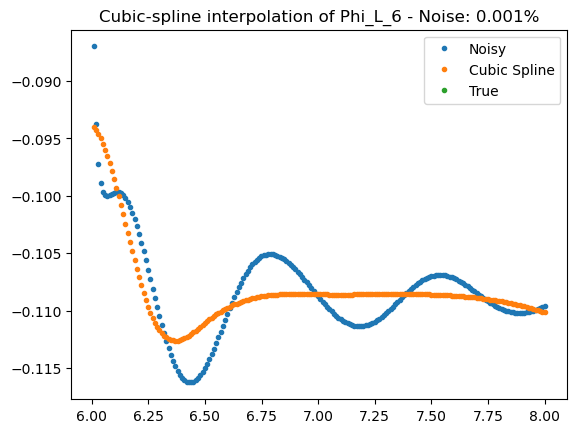

In [35]:
ind = 3
feature_ = "Phi_L_6"

plt.figure()
# plt.plot(data_matrix_df_list[1]["t"], data_matrix_df_list[1]["x"], "x", t_eval_new, x_new,
#         data_matrix_df[50:100]["t"], data_matrix_df[50:100]["x"], "o")

plt.plot(data_matrix_df_list[ind]["time"], data_matrix_df_list[ind][feature_], ".",
         data_matrix_smooth_df_list[ind]["time"],
         data_matrix_smooth_df_list[ind][feature_], ".",
         data_matrix_df_list[ind][ind * num_time_points:(ind + 1) * num_time_points]["time"],
         data_matrix_df_list[ind][ind * num_time_points:(ind + 1) * num_time_points][feature_], ".")
plt.legend(['Noisy', 'Cubic Spline', 'True'])
# plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Cubic-spline interpolation of {} - Noise: {}%'.format(feature_, noise_perc))
plt.show()

## Forming candidate library for powersystems

### Defining the sin interaction terms 

In [36]:
from dae_finder import FeatureCouplingTransformer

def coup_fun_sin_diff(x,y,i,j,gam_matrix):
    return np.sin(x-y- gam_matrix[i,j])

def coup_namer_sin_diff(x,y,i,j,gam_matrix=None):
    return "sin( {}-{} -gamma_{},{} )".format(x,y,i,j)


# def coup_fun_diff(x,y,i,j,gam_matrix):
#     return x-y- gam_matrix[i,j]

# def coup_namer_diff(x,y,i,j,gam_matrix):
#     return "{}-{} -gamma_{},{}".format(x,y,i,j)

transfomrer_sin_diff = FeatureCouplingTransformer(sparse_coupling_matrix_init,
                                           coupling_func= coup_fun_sin_diff,
                                           coupling_namer= coup_namer_sin_diff,
                                           coupling_func_args={"gam_matrix":gamma_matrix},
                                              return_df=True)

# transformer_diff = FeatureCouplingTransformer(sparse_coupling_matrix_init,
#                                            coupling_func= coup_fun_diff,
#                                            coupling_namer= coup_namer_diff,
#                                            coupling_func_args={"gam_matrix":gamma_matrix},
#                                               return_df=True)

In [37]:
data_matrix_df_comb = pd.concat(data_matrix_df_list, ignore_index=True)
data_matrix_df_smooth = data_matrix_df_comb
data_matrix_features = data_matrix_df_list[0].columns

In [38]:
#Creating library with sin(load angle difference)
sin_diff_library = transfomrer_sin_diff.fit_transform(data_matrix_df_smooth.drop(["time"], axis=1))
# sin_diff_library = transfomrer_sin_diff.fit_transform(data_matrix_df.drop(["time"], axis=1))

cop_ind = transfomrer_sin_diff.coupled_indices_list

# #Creating library with load angle difference
# diff_library = transformer_diff.fit_transform(data_matrix_df.drop(["time"], axis=1))


In [39]:
# candidate_lib = pd.concat([data_matrix_df.drop("time", axis=1), sin_diff_library], axis=1)

candidate_lib = pd.concat([data_matrix_df_smooth.drop("time", axis=1), sin_diff_library], axis=1)

In [40]:
candidate_lib

,Phi_G_1,Phi_G_2,Phi_G_3,Phi_G_4,Phi_G_5,Phi_G_6,Phi_G_7,Phi_G_8,Phi_G_9,Phi_G_10,...,"sin( Phi_L_26-Phi_L_26 -gamma_45,45 )","sin( Phi_L_26-Phi_L_27 -gamma_45,46 )","sin( Phi_L_26-Phi_L_28 -gamma_45,47 )","sin( Phi_L_26-Phi_L_29 -gamma_45,48 )","sin( Phi_L_27-Phi_L_27 -gamma_46,46 )","sin( Phi_L_27-Phi_L_28 -gamma_46,47 )","sin( Phi_L_27-Phi_L_29 -gamma_46,48 )","sin( Phi_L_28-Phi_L_28 -gamma_47,47 )","sin( Phi_L_28-Phi_L_29 -gamma_47,48 )","sin( Phi_L_29-Phi_L_29 -gamma_48,48 )"
0,-0.10269555,0.00215635,0.01326876,0.02181566,-0.00210537,0.05458520,0.10150333,-0.00600222,0.09160457,-0.23158718,...,-0.00000735,0.01620324,-0.03025205,-0.05647920,-0.00000735,-0.04644390,-0.07264916,-0.00000735,-0.02624959,-0.00000735
1,-0.09545456,0.00756351,0.01893923,0.02631602,0.00208853,0.05897062,0.10529333,-0.00095894,0.09518932,-0.22675237,...,-0.00000735,0.02334590,-0.04427599,-0.07987493,-0.00000735,-0.06758693,-0.10312447,-0.00000735,-0.03566208,-0.00000735
2,-0.08564281,0.01493068,0.02676690,0.03221557,0.00748275,0.06476008,0.11028663,0.00573891,0.09988971,-0.22071764,...,-0.00000735,0.02788034,-0.05230548,-0.09351086,-0.00000735,-0.08012733,-0.12123269,-0.00000735,-0.04130656,-0.00000735
3,-0.07445321,0.02340237,0.03579771,0.03885862,0.01351382,0.07122506,0.11589767,0.01331934,0.10514813,-0.21411376,...,-0.00000735,0.03073494,-0.05707522,-0.10160864,-0.00000735,-0.08773309,-0.13213651,-0.00000735,-0.04466318,-0.00000735
4,-0.06264404,0.03242135,0.04540148,0.04585042,0.01985137,0.07791907,0.12177781,0.02131262,0.11063577,-0.20734509,...,-0.00000735,0.03250699,-0.05982869,-0.10631988,-0.00000735,-0.09224583,-0.13858644,-0.00000735,-0.04663985,-0.00000735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19794,0.01028524,0.09407745,0.11528300,0.13681239,0.09009363,0.12624820,0.18645360,0.06954441,0.17462337,-0.14524833,...,-0.00000735,0.03336130,-0.06300269,-0.11090186,-0.00000735,-0.09626265,-0.14399563,-0.00000735,-0.04806748,-0.00000735
19795,0.00985429,0.09353003,0.11878109,0.13586880,0.08849517,0.12486469,0.18953420,0.07223336,0.17344529,-0.14692196,...,-0.00000735,0.03331239,-0.06258009,-0.11034448,-0.00000735,-0.09579245,-0.14339220,-0.00000735,-0.04793026,-0.00000735
19796,0.00938443,0.09309490,0.12209794,0.13464653,0.08710937,0.12368200,0.19248591,0.07515437,0.17227054,-0.14869984,...,-0.00000735,0.03327623,-0.06214592,-0.10977864,-0.00000735,-0.09532342,-0.14279296,-0.00000735,-0.04779613,-0.00000735
19797,0.00889304,0.09278147,0.12519845,0.13315922,0.08595106,0.12272472,0.19526596,0.07825827,0.17111406,-0.15055108,...,-0.00000735,0.03324419,-0.06171172,-0.10920805,-0.00000735,-0.09485843,-0.14219303,-0.00000735,-0.04765728,-0.00000735


### Removing zero features

In [41]:
non_zero_column_series = (candidate_lib**2).sum() > 0.01
non_zero_column_series
non_columns = [column for column in candidate_lib if non_zero_column_series[column]]

candidate_lib = candidate_lib[non_columns]

## Finding Algebraic relationship

### Using sympy to find factors of redundant feature and refine the library

In [42]:
import sympy

from dae_finder import get_refined_lib, remove_paranth_from_feat

# Adding the state variables as scipy symbols
feat_list = list(data_matrix_df_appended.columns)
feat_list_str = ", ".join(remove_paranth_from_feat(data_matrix_df_appended.columns))
exec(feat_list_str+ "= sympy.symbols("+str(feat_list)+")")

In [43]:
data_matrix_df_smooth_appended.columns

Index(['time', 'Phi_G_1', 'd(Phi_G_1) /dt', 'Phi_G_2', 'd(Phi_G_2) /dt',
       'Phi_G_3', 'd(Phi_G_3) /dt', 'Phi_G_4', 'd(Phi_G_4) /dt', 'Phi_G_5',
       ...
       'P_L_25', 'd(P_L_25) /dt', 'P_L_26', 'd(P_L_26) /dt', 'P_L_27',
       'd(P_L_27) /dt', 'P_L_28', 'd(P_L_28) /dt', 'P_L_29', 'd(P_L_29) /dt'],
      dtype='object', length=295)

In [44]:
data_matrix_features

Index(['time', 'Phi_G_1', 'Phi_G_2', 'Phi_G_3', 'Phi_G_4', 'Phi_G_5',
       'Phi_G_6', 'Phi_G_7', 'Phi_G_8', 'Phi_G_9',
       ...
       'P_L_20', 'P_L_21', 'P_L_22', 'P_L_23', 'P_L_24', 'P_L_25', 'P_L_26',
       'P_L_27', 'P_L_28', 'P_L_29'],
      dtype='object', length=148)

In [45]:
feature_list = list(data_matrix_features)
feature_list.remove('time')

feature_list

['Phi_G_1',
 'Phi_G_2',
 'Phi_G_3',
 'Phi_G_4',
 'Phi_G_5',
 'Phi_G_6',
 'Phi_G_7',
 'Phi_G_8',
 'Phi_G_9',
 'Phi_G_10',
 'Phi_T_1',
 'Phi_T_2',
 'Phi_T_3',
 'Phi_T_4',
 'Phi_T_5',
 'Phi_T_6',
 'Phi_T_7',
 'Phi_T_8',
 'Phi_T_9',
 'Phi_T_10',
 'Phi_L_1',
 'Phi_L_2',
 'Phi_L_3',
 'Phi_L_4',
 'Phi_L_5',
 'Phi_L_6',
 'Phi_L_7',
 'Phi_L_8',
 'Phi_L_9',
 'Phi_L_10',
 'Phi_L_11',
 'Phi_L_12',
 'Phi_L_13',
 'Phi_L_14',
 'Phi_L_15',
 'Phi_L_16',
 'Phi_L_17',
 'Phi_L_18',
 'Phi_L_19',
 'Phi_L_20',
 'Phi_L_21',
 'Phi_L_22',
 'Phi_L_23',
 'Phi_L_24',
 'Phi_L_25',
 'Phi_L_26',
 'Phi_L_27',
 'Phi_L_28',
 'Phi_L_29',
 'om_G_1',
 'om_G_2',
 'om_G_3',
 'om_G_4',
 'om_G_5',
 'om_G_6',
 'om_G_7',
 'om_G_8',
 'om_G_9',
 'om_G_10',
 'om_T_1',
 'om_T_2',
 'om_T_3',
 'om_T_4',
 'om_T_5',
 'om_T_6',
 'om_T_7',
 'om_T_8',
 'om_T_9',
 'om_T_10',
 'om_L_1',
 'om_L_2',
 'om_L_3',
 'om_L_4',
 'om_L_5',
 'om_L_6',
 'om_L_7',
 'om_L_8',
 'om_L_9',
 'om_L_10',
 'om_L_11',
 'om_L_12',
 'om_L_13',
 'om_L_14',
 'om_L_15

In [46]:
refined_candid_lib = data_matrix_df_smooth_appended[feature_list]

In [47]:
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler(with_std=True, with_mean=False)
scaled_refined_lib = pd.DataFrame(s_scaler.fit_transform(refined_candid_lib), columns=s_scaler.feature_names_in_)
scaled_cand_lib = pd.DataFrame(s_scaler.fit_transform(candidate_lib), columns=s_scaler.feature_names_in_)

In [48]:
candidate_lib

,Phi_G_1,Phi_G_2,Phi_G_3,Phi_G_4,Phi_G_5,Phi_G_6,Phi_G_7,Phi_G_8,Phi_G_9,Phi_G_10,...,"sin( Phi_L_25-Phi_L_26 -gamma_44,45 )","sin( Phi_L_25-Phi_L_27 -gamma_44,46 )","sin( Phi_L_25-Phi_L_28 -gamma_44,47 )","sin( Phi_L_25-Phi_L_29 -gamma_44,48 )","sin( Phi_L_26-Phi_L_27 -gamma_45,46 )","sin( Phi_L_26-Phi_L_28 -gamma_45,47 )","sin( Phi_L_26-Phi_L_29 -gamma_45,48 )","sin( Phi_L_27-Phi_L_28 -gamma_46,47 )","sin( Phi_L_27-Phi_L_29 -gamma_46,48 )","sin( Phi_L_28-Phi_L_29 -gamma_47,48 )"
0,-0.10269555,0.00215635,0.01326876,0.02181566,-0.00210537,0.05458520,0.10150333,-0.00600222,0.09160457,-0.23158718,...,-0.00574618,0.01045755,-0.03599510,-0.06221527,0.01620324,-0.03025205,-0.05647920,-0.04644390,-0.07264916,-0.02624959
1,-0.09545456,0.00756351,0.01893923,0.02631602,0.00208853,0.05897062,0.10529333,-0.00095894,0.09518932,-0.22675237,...,0.00195850,0.02530382,-0.04231933,-0.07792254,0.02334590,-0.04427599,-0.07987493,-0.06758693,-0.10312447,-0.03566208
2,-0.08564281,0.01493068,0.02676690,0.03221557,0.00748275,0.06476008,0.11028663,0.00573891,0.09988971,-0.22071764,...,0.00752236,0.03539899,-0.04479193,-0.08601881,0.02788034,-0.05230548,-0.09351086,-0.08012733,-0.12123269,-0.04130656
3,-0.07445321,0.02340237,0.03579771,0.03885862,0.01351382,0.07122506,0.11589767,0.01331934,0.10514813,-0.21411376,...,0.01119423,0.04192195,-0.04589566,-0.09046598,0.03073494,-0.05707522,-0.10160864,-0.08773309,-0.13213651,-0.04466318
4,-0.06264404,0.03242135,0.04540148,0.04585042,0.01985137,0.07791907,0.12177781,0.02131262,0.11063577,-0.20734509,...,0.01369036,0.04618707,-0.04615725,-0.09269716,0.03250699,-0.05982869,-0.10631988,-0.09224583,-0.13858644,-0.04663985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19794,0.01028524,0.09407745,0.11528300,0.13681239,0.09009363,0.12624820,0.18645360,0.06954441,0.17462337,-0.14524833,...,0.01283731,0.04618871,-0.05018570,-0.09813460,0.03336130,-0.06300269,-0.11090186,-0.09626265,-0.14399563,-0.04806748
19795,0.00985429,0.09353003,0.11878109,0.13586880,0.08849517,0.12486469,0.18953420,0.07223336,0.17344529,-0.14692196,...,0.01331858,0.04662062,-0.04928207,-0.09709744,0.03331239,-0.06258009,-0.11034448,-0.09579245,-0.14339220,-0.04793026
19796,0.00938443,0.09309490,0.12209794,0.13464653,0.08710937,0.12368200,0.19248591,0.07515437,0.17227054,-0.14869984,...,0.01382513,0.04709053,-0.04834157,-0.09602658,0.03327623,-0.06214592,-0.10977864,-0.09532342,-0.14279296,-0.04779613
19797,0.00889304,0.09278147,0.12519845,0.13315922,0.08595106,0.12272472,0.19526596,0.07825827,0.17111406,-0.15055108,...,0.01435342,0.04758625,-0.04737930,-0.09492923,0.03324419,-0.06171172,-0.10920805,-0.09485843,-0.14219303,-0.04765728


# Using Lasso

## Finding the conservation laws

In [ ]:
from dae_finder import sequentialThLin, AlgModelFinder
algebraic_model_lasso = AlgModelFinder(model_id='lasso',
                                       alpha=0.3,
                                       fit_intercept=True)

In [ ]:
# features_to_fit_ = ["Phi_0", "Phi_1", "Phi_2", "Phi_3", "Phi_4", "Phi_5",
#                     "P_0", "P_1", "P_2", "P_3", "P_4", "P_5"]
# features_to_fit_ = ["P_0", "P_1", "P_2", "P_3", "P_4", "P_5"]
# num_nodes = 6
# power_features = ["P_{}".format(ind) for ind in range(num_nodes)]

# Mapping each power feature to possible expressions in the algebraic relationship. This is done by taking the power features and frequency
# feature from the candidate library
feature_to_libr_map = {power_feat: candidate_lib.columns.drop(power_features+freq_features) for power_feat in power_features}

algebraic_model_lasso.fit(candidate_lib, scale_columns=True,
                          features_to_fit=power_features,
                          feature_to_library_map_=feature_to_libr_map)


In [ ]:
# special_scaled_lib = scaled_cand_lib.drop(power_features, axis=1)
# special_scaled_lib = pd.concat((special_scaled_lib, candidate_lib[power_features]), axis=1)

In [ ]:
# # features_to_fit_ = ["Phi_0", "Phi_1", "Phi_2", "Phi_3", "Phi_4", "Phi_5",
# #                     "P_0", "P_1", "P_2", "P_3", "P_4", "P_5"]
# # features_to_fit_ = ["P_0", "P_1", "P_2", "P_3", "P_4", "P_5"]
# # num_nodes = 6
# # power_features = ["P_{}".format(ind) for ind in range(num_nodes)]

# # Mapping each power feature to possible expressions in the algebraic relationship. This is done by taking the power features and frequency
# # feature from the candidate library

# seq_th_model = sequentialThLin(model_id="lasso", alpha=0.3, coef_threshold=0.1, fit_intercept=True)


# algebraic_model_lasso = AlgModelFinder(custom_model=True, custom_model_ob=seq_th_model)

# # dynamic_model_th.fit(X=refined_candid_lib_appended,
# #                      scale_columns=False,
# #                      features_to_fit=dynamic_feat_to_fit,
# #                      feature_to_library_map=dynamic_feature_to_libr_map)
# feature_to_libr_map = {power_feat: candidate_lib.columns.drop(power_features+freq_features) for power_feat in power_features}

# algebraic_model_lasso.fit(X=candidate_lib,
#                                   scale_columns=True,
#                                   features_to_fit=power_features,
#                                   feature_to_library_map=feature_to_libr_map)


In [54]:
algebraic_model_lasso.best_models()

,P_G_1,P_G_5,P_G_4,P_G_8,P_G_3,P_G_6,P_G_2,P_G_7,P_G_10,P_G_9,...,P_L_3,P_T_5,P_L_14,P_T_2,P_T_7,P_T_9,P_T_10,P_L_5,P_L_20,P_L_21
Phi_G_1,0.00000000,-0.00000000,0.00000000,0.00000000,-0.00000000,-0.00000000,-0.00000000,-0.00000000,-0.00000000,-0.00000000,...,-0.00000000,-0.00000000,0.00000000,-0.00000000,-0.00000000,-0.00000000,0.00000000,-0.00000000,0.00000000,-0.00000000
Phi_G_2,-0.00000000,-0.00000000,0.00000000,0.00000000,-0.00000000,0.00000000,0.00000000,-0.00000000,-0.00000000,-0.00000000,...,0.00000000,-0.00000000,0.00000000,0.00000000,-0.00000000,0.00000000,-0.00000000,-0.00000000,0.00000000,-0.00000000
Phi_G_3,0.00000000,0.00000000,-0.00000000,0.00000000,0.00000000,-0.00000000,-0.00000000,-0.00000000,-0.00000000,-0.00000000,...,0.00000000,-0.00000000,-0.00000000,-0.00000000,-0.00000000,-0.00000000,-0.00000000,-0.00000000,-0.00000000,-0.00000000
Phi_G_4,0.00000000,-0.00000000,0.00000000,-0.00000000,-0.00000000,-0.00000000,0.00000000,-0.00000000,-0.00000000,-0.00000000,...,0.00000000,-0.00000000,0.00000000,-0.00000000,-0.00000000,-0.00000000,-0.00000000,-0.00000000,-0.00000000,-0.00000000
Phi_G_5,-0.00000000,0.00000000,-0.00000000,-0.00000000,0.00000000,-0.00000000,-0.00000000,0.00000000,-0.00000000,-0.00000000,...,-0.00000000,0.00000000,0.00000000,0.00000000,-0.00000000,0.00000000,-0.00000000,-0.00000000,-0.00000000,-0.00000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"sin( Phi_L_26-Phi_L_29 -gamma_45,48 )",0.00000000,-0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-0.00000000,0.00000000,-0.00000000,...,0.00000000,0.00000000,-0.00000000,0.00000000,-0.00000000,-0.00000000,0.00000000,0.00000000,-0.00000000,-0.00000000
"sin( Phi_L_27-Phi_L_28 -gamma_46,47 )",0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-0.00000000,...,-0.00000000,0.00000000,-0.00000000,0.00000000,0.00000000,-0.00000000,-0.00000000,0.00000000,-0.00000000,-0.00000000
"sin( Phi_L_27-Phi_L_29 -gamma_46,48 )",0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-0.00000000,...,-0.00000000,0.00000000,-0.00000000,0.00000000,0.00000000,-0.00000000,0.00000000,0.00000000,-0.00000000,-0.00000000
"sin( Phi_L_28-Phi_L_29 -gamma_47,48 )",0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-0.00000000,-0.00000000,-0.00000000,...,0.00000000,-0.00000000,0.00000000,0.00000000,-0.00000000,-0.00000000,0.00000000,-0.00000000,-0.00000000,0.00000000


In [55]:
for feat in power_features:
    print(feat)
    print(algebraic_model_lasso.best_models()[feat][abs(algebraic_model_lasso.best_models()[feat])>0.1])

P_G_1
sin( Phi_G_1-Phi_T_1 -gamma_0,10 )   10.89347316
r2- metric                            0.90999952
Name: P_G_1, dtype: float64
P_G_2
sin( Phi_G_2-Phi_T_2 -gamma_1,11 )   31.96708627
r2- metric                            0.90999851
Name: P_G_2, dtype: float64
P_G_3
sin( Phi_G_3-Phi_T_3 -gamma_2,12 )   33.14500460
r2- metric                            0.90999867
Name: P_G_3, dtype: float64
P_G_4
sin( Phi_G_4-Phi_T_4 -gamma_3,13 )   32.81280131
r2- metric                            0.90999897
Name: P_G_4, dtype: float64
P_G_5
sin( Phi_G_5-Phi_T_5 -gamma_4,14 )   25.45604138
r2- metric                            0.90999908
Name: P_G_5, dtype: float64
P_G_6
sin( Phi_G_6-Phi_T_6 -gamma_5,15 )   37.68986836
r2- metric                            0.90999863
Name: P_G_6, dtype: float64
P_G_7
sin( Phi_G_7-Phi_T_7 -gamma_6,16 )   31.89690215
r2- metric                            0.90999841
Name: P_G_7, dtype: float64
P_G_8
sin( Phi_G_8-Phi_T_8 -gamma_7,17 )   28.39432396
r2- metric           

### Checking model accuracy

### Extracting true models from the true coupling matrix

In [56]:
fitted_models = algebraic_model_lasso.best_models()[:-1]

In [57]:
true_models = pd.DataFrame(columns=fitted_models.columns, index=fitted_models.index)
true_models.fillna(0, inplace=True)
for ind_i, power_feat in enumerate(power_features):
    for ind_j in range(len(power_features)):
        if abs(coupling_matrix_true[ind_i, ind_j]) > 0.1:
            # true_models.loc[feat_name, power_feat] = coupling_matrix_true[ind_i, ind_j]
            low_ind = min(ind_i, ind_j)
            up_ind = max(ind_i, ind_j)
            feat_name = coup_namer_sin_diff(phase_features[low_ind], phase_features[up_ind],
                                        low_ind, up_ind)
            # print(feat_name)
            true_models.loc[feat_name, power_feat] = 20.0
            
            # print(ind_i, ind_j, coupling_matrix_true[ind_i, ind_j])
        # true_models[power_feat][feat_name] = "haha"
        # print(ind_i, ind_j, feat_name)
        # print(true_models[power_feat])

/var/folders/vm/q63p6h6d0j70_r0d8tpfx9gc0000gn/T/ipykernel_40332/581240014.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  true_models.fillna(0, inplace=True)


In [58]:
# def compare_models(models_df_1, models_df_2, tol=1.e-5):
#     assert models_df_1.shape == models_df_2.shape, "both model dataframes should be of the same shape"
#     assert all(models_df_1.columns == models_df_2.columns) and all(models_df_1.index == models_df_2.index)

#     models_df_1[abs(models_df_1) > tol] = 1
#     models_df_1[abs(models_df_1) <= tol] = 0

#     models_df_2[abs(models_df_2) > tol] = 1
#     models_df_2[abs(models_df_2) <= tol] = 0

#     model_diff_df = models_df_1 - models_df_2

#     model_diff_df.loc["# incosistent terms"] = abs(model_diff_df).sum()

#     return model_diff_df

In [59]:
from dae_finder import compare_models_

compare_models_(true_models, fitted_models)

,P_G_1,P_G_5,P_G_4,P_G_8,P_G_3,P_G_6,P_G_2,P_G_7,P_G_10,P_G_9,...,P_L_3,P_T_5,P_L_14,P_T_2,P_T_7,P_T_9,P_T_10,P_L_5,P_L_20,P_L_21
Phi_G_1,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
Phi_G_2,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
Phi_G_3,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
Phi_G_4,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
Phi_G_5,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"sin( Phi_L_26-Phi_L_29 -gamma_45,48 )",0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
"sin( Phi_L_27-Phi_L_28 -gamma_46,47 )",0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
"sin( Phi_L_27-Phi_L_29 -gamma_46,48 )",0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
"sin( Phi_L_28-Phi_L_29 -gamma_47,48 )",0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000


## Finding the dynamic equation for generators

### Refined candidate library is able to find the model 

In [60]:
from sklearn.linear_model import Lasso

alg_lasso = Lasso(fit_intercept=True, alpha=0.3)
alg_lasso.fit(X=scaled_refined_lib, y=data_matrix_df_smooth_appended['d(om_0) /dt'])
alg_lasso.score(X=scaled_refined_lib, y=data_matrix_df_smooth_appended['d(om_0) /dt'])

KeyError: 'd(om_0) /dt'

In [ ]:
coef_dict = dict(zip(alg_lasso.feature_names_in_, alg_lasso.coef_))
coef_dict

In [ ]:
seq_th_model.intercept_

In [ ]:
non_zero_feat = [feat for feat, coef in coef_dict.items() if abs(coef) > 0.01]
non_zero_feat

In [ ]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X=scaled_refined_lib[non_zero_feat], y=data_matrix_df_smooth_appended['d(om_0) /dt'])
lin_model.score(X=scaled_refined_lib[non_zero_feat], y=data_matrix_df_smooth_appended['d(om_0) /dt'])

In [ ]:
dict(zip(lin_model.feature_names_in_, lin_model.coef_))

### Full candidate library is unable to find the model 

In [ ]:
alg_lasso.fit(X=scaled_cand_lib, y=data_matrix_df_smooth_appended['d(om_0) /dt'])
alg_lasso.score(X=scaled_cand_lib, y=data_matrix_df_smooth_appended['d(om_0) /dt'])

In [ ]:
dict(zip(alg_lasso.feature_names_in_, alg_lasso.coef_))

# Using Sequential Thresholding

## Finding the conservation laws

In [49]:
from dae_finder import sequentialThLin, AlgModelFinder
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression
lin_reg_model_arg = {"fit_intercept": True}
seq_th_model = sequentialThLin(custom_model=True,
                               custom_model_ob = lin_reg_model,
                               custom_model_arg= lin_reg_model_arg,
                              coef_threshold=0.1)
# seq_th_model = sequentialThLin(coef_threshold=0.1, alpha=0.3, fit_intercept=True)

algebraic_model_th = AlgModelFinder(custom_model=True, custom_model_ob=seq_th_model)

In [50]:
feature_to_libr_map = {power_feat: candidate_lib.columns.drop(phase_features+power_features+freq_features) for power_feat in power_features}
feature_to_libr_map_constr = {power_feat: [lib_feat for lib_feat in lib_features if power_feat[2:]+" " in lib_feat or power_feat[2:]+"-" in lib_feat] for power_feat, lib_features in feature_to_libr_map.items()}

# feature_to_libr_map = {power_feat: candidate_lib.columns.drop(power_features+freq_features) for power_feat in power_features}
# algebraic_model_th.fit(candidate_lib, scale_columns=True,
#                        features_to_fit=power_features,
#                        feature_to_library_map_=feature_to_libr_map_constr)


algebraic_model_th.fit(candidate_lib, scale_columns=True,
                       features_to_fit=power_features,
                       feature_to_library_map_=feature_to_libr_map_constr)

Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential th

AlgModelFinder(custom_model=True,
               custom_model_ob=<dae_finder.sequentialThLin object at 0x13b367fb0>)

In [51]:
freq_features

['om_G_1',
 'om_G_2',
 'om_G_3',
 'om_G_4',
 'om_G_5',
 'om_G_6',
 'om_G_7',
 'om_G_8',
 'om_G_9',
 'om_G_10',
 'om_T_1',
 'om_T_2',
 'om_T_3',
 'om_T_4',
 'om_T_5',
 'om_T_6',
 'om_T_7',
 'om_T_8',
 'om_T_9',
 'om_T_10',
 'om_L_1',
 'om_L_2',
 'om_L_3',
 'om_L_4',
 'om_L_5',
 'om_L_6',
 'om_L_7',
 'om_L_8',
 'om_L_9',
 'om_L_10',
 'om_L_11',
 'om_L_12',
 'om_L_13',
 'om_L_14',
 'om_L_15',
 'om_L_16',
 'om_L_17',
 'om_L_18',
 'om_L_19',
 'om_L_20',
 'om_L_21',
 'om_L_22',
 'om_L_23',
 'om_L_24',
 'om_L_25',
 'om_L_26',
 'om_L_27',
 'om_L_28',
 'om_L_29']

In [52]:
#Best 10 models using R2 metrix
algebraic_model_th.best_models()

,P_G_1,P_G_8,P_G_5,P_G_3,P_G_4,P_G_2,P_G_6,P_G_7,P_G_10,P_G_9,...,P_L_13,P_L_11,P_L_17,P_L_8,P_L_2,P_L_7,P_L_5,P_L_16,P_L_10,P_L_6
"sin( Phi_G_1-Phi_G_2 -gamma_0,1 )",0.00000000,NaN,NaN,NaN,NaN,0.00000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"sin( Phi_G_1-Phi_G_3 -gamma_0,2 )",0.00000000,NaN,NaN,0.00000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"sin( Phi_G_1-Phi_G_4 -gamma_0,3 )",0.00000000,NaN,NaN,NaN,0.00000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"sin( Phi_G_1-Phi_G_5 -gamma_0,4 )",0.00000000,NaN,0.00000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"sin( Phi_G_1-Phi_G_6 -gamma_0,5 )",0.00000000,NaN,NaN,NaN,NaN,NaN,0.00000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"sin( Phi_L_5-Phi_L_16 -gamma_24,35 )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00000000,0.00000000,NaN,NaN
"sin( Phi_L_6-Phi_L_16 -gamma_25,35 )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000000,NaN,0.00000000
"sin( Phi_L_10-Phi_L_16 -gamma_29,35 )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000000,0.00000000,NaN
"sin( Phi_L_6-Phi_L_10 -gamma_25,29 )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000000,0.00000000


In [53]:
algebraic_model_th.get_fitted_intercepts()

{'P_G_1': 1.5542092036168226e-06,
 'P_G_2': -1.4584681996070592e-05,
 'P_G_3': 1.0570622520134127e-05,
 'P_G_4': 7.962318079541717e-06,
 'P_G_5': 8.1790541481557e-06,
 'P_G_6': -3.322093790766372e-06,
 'P_G_7': -4.780034846151275e-06,
 'P_G_8': -6.848353526273741e-06,
 'P_G_9': 1.5289715766565574e-05,
 'P_G_10': -3.1663596087619513e-06,
 'P_T_1': 2.0547403467574787e-06,
 'P_T_2': 1.1455704891604922e-05,
 'P_T_3': -9.09148397034785e-06,
 'P_T_4': -7.906258113646559e-06,
 'P_T_5': -3.9068907869247525e-06,
 'P_T_6': 4.1644486298282937e-07,
 'P_T_7': -3.649559621201407e-07,
 'P_T_8': 2.7636291208876734e-06,
 'P_T_9': -4.712717731099859e-07,
 'P_T_10': 3.137523769156939e-05,
 'P_L_1': -2.3758549837852042e-05,
 'P_L_2': 1.1179260480620435e-05,
 'P_L_3': -2.6639608330995973e-05,
 'P_L_4': 6.728524517655738e-05,
 'P_L_5': 1.0040069957229509e-05,
 'P_L_6': -8.332970545962662e-05,
 'P_L_7': 0.00021955207138655232,
 'P_L_8': -2.3325733789988225e-05,
 'P_L_9': -9.78092679433767e-07,
 'P_L_10': -8.

In [54]:
for feat in power_features:
    print(feat)
    print(algebraic_model_th.best_models()[feat][abs(algebraic_model_th.best_models()[feat])>0.1])

P_G_1
sin( Phi_G_1-Phi_T_1 -gamma_0,10 )   15.56214857
r2- metric                            0.99999999
Name: P_G_1, dtype: float64
P_G_2
sin( Phi_G_2-Phi_T_2 -gamma_1,11 )   45.66640979
r2- metric                            0.99999997
Name: P_G_2, dtype: float64
P_G_3
sin( Phi_G_3-Phi_T_3 -gamma_2,12 )   47.34967789
r2- metric                            0.99999997
Name: P_G_3, dtype: float64
P_G_4
sin( Phi_G_4-Phi_T_4 -gamma_3,13 )   46.87573779
r2- metric                            0.99999997
Name: P_G_4, dtype: float64
P_G_5
sin( Phi_G_5-Phi_T_5 -gamma_4,14 )   36.36575247
r2- metric                            0.99999997
Name: P_G_5, dtype: float64
P_G_6
sin( Phi_G_6-Phi_T_6 -gamma_5,15 )   53.84205430
r2- metric                            0.99999997
Name: P_G_6, dtype: float64
P_G_7
sin( Phi_G_7-Phi_T_7 -gamma_6,16 )   45.56731649
r2- metric                            0.99999995
Name: P_G_7, dtype: float64
P_G_8
sin( Phi_G_8-Phi_T_8 -gamma_7,17 )   40.56282201
r2- metric           

### Checking model accuracy

### Extracting true models from the true coupling matrix

In [55]:
fitted_models = algebraic_model_th.best_models()[:-1]

In [56]:
true_models = pd.DataFrame(columns=fitted_models.columns, index=fitted_models.index)
true_models.fillna(0, inplace=True)
for ind_i, power_feat in enumerate(power_features):
    for ind_j in range(len(power_features)):
        if abs(coupling_matrix_true[ind_i, ind_j]) > 0.5:
            # true_models.loc[feat_name, power_feat] = coupling_matrix_true[ind_i, ind_j]
            low_ind = min(ind_i, ind_j)
            up_ind = max(ind_i, ind_j)
            feat_name = coup_namer_sin_diff(phase_features[low_ind], phase_features[up_ind],
                                        low_ind, up_ind)
            # print(feat_name)
            true_models.loc[feat_name, power_feat] = 20.0
            
            # print(ind_i, ind_j, coupling_matrix_true[ind_i, ind_j])
        # true_models[power_feat][feat_name] = "haha"
        # print(ind_i, ind_j, feat_name)
        # print(true_models[power_feat])

/var/folders/vm/q63p6h6d0j70_r0d8tpfx9gc0000gn/T/ipykernel_41203/62148402.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  true_models.fillna(0, inplace=True)


In [57]:
# def compare_models(models_df_1, models_df_2, tol=1.e-5):
#     assert models_df_1.shape == models_df_2.shape, "both model dataframes should be of the same shape"
#     assert all(models_df_1.columns == models_df_2.columns) and all(models_df_1.index == models_df_2.index)

#     models_df_1[abs(models_df_1) > tol] = 1
#     models_df_1[abs(models_df_1) <= tol] = 0

#     models_df_2[abs(models_df_2) > tol] = 1
#     models_df_2[abs(models_df_2) <= tol] = 0

#     model_diff_df = models_df_1 - models_df_2

#     model_diff_df.loc["# incosistent terms"] = abs(model_diff_df).sum()

#     return model_diff_df

In [58]:
from dae_finder import compare_models_

compare_models_(true_models, fitted_models)

,P_G_1,P_G_8,P_G_5,P_G_3,P_G_4,P_G_2,P_G_6,P_G_7,P_G_10,P_G_9,...,P_L_13,P_L_11,P_L_17,P_L_8,P_L_2,P_L_7,P_L_5,P_L_16,P_L_10,P_L_6
"sin( Phi_G_1-Phi_G_2 -gamma_0,1 )",0.00000000,NaN,NaN,NaN,NaN,0.00000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"sin( Phi_G_1-Phi_G_3 -gamma_0,2 )",0.00000000,NaN,NaN,0.00000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"sin( Phi_G_1-Phi_G_4 -gamma_0,3 )",0.00000000,NaN,NaN,NaN,0.00000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"sin( Phi_G_1-Phi_G_5 -gamma_0,4 )",0.00000000,NaN,0.00000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"sin( Phi_G_1-Phi_G_6 -gamma_0,5 )",0.00000000,NaN,NaN,NaN,NaN,NaN,0.00000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"sin( Phi_L_5-Phi_L_16 -gamma_24,35 )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00000000,0.00000000,NaN,NaN
"sin( Phi_L_6-Phi_L_16 -gamma_25,35 )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000000,NaN,0.00000000
"sin( Phi_L_10-Phi_L_16 -gamma_29,35 )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000000,0.00000000,NaN
"sin( Phi_L_6-Phi_L_10 -gamma_25,29 )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000000,0.00000000


In [59]:
compare_model_output = compare_models_(true_models, fitted_models)

In [60]:
compare_model_output.loc["# incosistent terms"]

P_G_1    0.00000000
P_G_8    0.00000000
P_G_5    0.00000000
P_G_3    0.00000000
P_G_4    0.00000000
P_G_2    0.00000000
P_G_6    0.00000000
P_G_7    0.00000000
P_G_10   0.00000000
P_G_9    0.00000000
P_L_12   0.00000000
P_T_8    0.00000000
P_L_19   0.00000000
P_T_1    0.00000000
P_L_28   0.00000000
P_T_4    0.00000000
P_T_3    0.00000000
P_T_2    0.00000000
P_L_22   0.00000000
P_T_5    0.00000000
P_L_29   0.00000000
P_L_20   0.00000000
P_T_6    0.00000000
P_L_23   0.00000000
P_L_25   0.00000000
P_T_7    0.00000000
P_L_26   0.00000000
P_L_27   0.00000000
P_L_9    0.00000000
P_L_21   0.00000000
P_L_1    0.00000000
P_L_14   0.00000000
P_L_15   0.00000000
P_T_10   0.00000000
P_L_4    0.00000000
P_L_3    0.00000000
P_T_9    0.00000000
P_L_24   0.00000000
P_L_18   0.00000000
P_L_13   0.00000000
P_L_11   0.00000000
P_L_17   0.00000000
P_L_8    0.00000000
P_L_2    0.00000000
P_L_7    0.00000000
P_L_5    0.00000000
P_L_16   0.00000000
P_L_10   0.00000000
P_L_6    0.00000000
Name: # incosistent 

In [61]:
compare_model_output.loc["# incosistent terms"][["P_T_"+str(ind) for ind in range(1,11)]]

P_T_1    0.00000000
P_T_2    0.00000000
P_T_3    0.00000000
P_T_4    0.00000000
P_T_5    0.00000000
P_T_6    0.00000000
P_T_7    0.00000000
P_T_8    0.00000000
P_T_9    0.00000000
P_T_10   0.00000000
Name: # incosistent terms, dtype: float64

In [62]:
algebraic_model_th.best_models()["P_T_9"] [abs(algebraic_model_th.best_models()["P_T_9"])>0.1]

sin( Phi_G_9-Phi_T_9 -gamma_8,18 )     -70.78930972
sin( Phi_T_9-Phi_L_29 -gamma_18,48 )    67.58905717
r2- metric                               0.99999634
Name: P_T_9, dtype: float64

In [63]:
true_models["P_T_9"][abs(true_models["P_T_9"]) > 0.1]

sin( Phi_G_9-Phi_T_9 -gamma_8,18 )      1
sin( Phi_T_9-Phi_L_29 -gamma_18,48 )    1
Name: P_T_9, dtype: int64

In [64]:
coupling_matrix_true

array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   , 73.629],
       [ 0.   ,  0.   ,  0.   , ...,  0.   , 73.629,  0.   ]])

In [65]:
compare_model_output["P_T_1"][abs(compare_model_output["P_T_1"]) > 0.1]

Series([], Name: P_T_1, dtype: float64)

In [66]:
feature_to_libr_map_constr = {power_feat: [lib_feat for lib_feat in lib_features if power_feat[2:]+" " in lib_feat or power_feat[2:]+"-" in lib_feat] for power_feat, lib_features in feature_to_libr_map.items()}

feature_to_libr_map_constr["P_L_20"]

['sin( Phi_G_1-Phi_L_20 -gamma_0,39 )',
 'sin( Phi_G_2-Phi_L_20 -gamma_1,39 )',
 'sin( Phi_G_3-Phi_L_20 -gamma_2,39 )',
 'sin( Phi_G_4-Phi_L_20 -gamma_3,39 )',
 'sin( Phi_G_5-Phi_L_20 -gamma_4,39 )',
 'sin( Phi_G_6-Phi_L_20 -gamma_5,39 )',
 'sin( Phi_G_7-Phi_L_20 -gamma_6,39 )',
 'sin( Phi_G_8-Phi_L_20 -gamma_7,39 )',
 'sin( Phi_G_9-Phi_L_20 -gamma_8,39 )',
 'sin( Phi_G_10-Phi_L_20 -gamma_9,39 )',
 'sin( Phi_T_1-Phi_L_20 -gamma_10,39 )',
 'sin( Phi_T_2-Phi_L_20 -gamma_11,39 )',
 'sin( Phi_T_3-Phi_L_20 -gamma_12,39 )',
 'sin( Phi_T_4-Phi_L_20 -gamma_13,39 )',
 'sin( Phi_T_5-Phi_L_20 -gamma_14,39 )',
 'sin( Phi_T_6-Phi_L_20 -gamma_15,39 )',
 'sin( Phi_T_7-Phi_L_20 -gamma_16,39 )',
 'sin( Phi_T_8-Phi_L_20 -gamma_17,39 )',
 'sin( Phi_T_9-Phi_L_20 -gamma_18,39 )',
 'sin( Phi_T_10-Phi_L_20 -gamma_19,39 )',
 'sin( Phi_L_1-Phi_L_20 -gamma_20,39 )',
 'sin( Phi_L_2-Phi_L_20 -gamma_21,39 )',
 'sin( Phi_L_3-Phi_L_20 -gamma_22,39 )',
 'sin( Phi_L_4-Phi_L_20 -gamma_23,39 )',
 'sin( Phi_L_5-Phi_L_20 

In [67]:
sin_diff_library[abs(sin_diff_library)>0.0001]

,"sin( Phi_G_1-Phi_G_1 -gamma_0,0 )","sin( Phi_G_1-Phi_G_2 -gamma_0,1 )","sin( Phi_G_1-Phi_G_3 -gamma_0,2 )","sin( Phi_G_1-Phi_G_4 -gamma_0,3 )","sin( Phi_G_1-Phi_G_5 -gamma_0,4 )","sin( Phi_G_1-Phi_G_6 -gamma_0,5 )","sin( Phi_G_1-Phi_G_7 -gamma_0,6 )","sin( Phi_G_1-Phi_G_8 -gamma_0,7 )","sin( Phi_G_1-Phi_G_9 -gamma_0,8 )","sin( Phi_G_1-Phi_G_10 -gamma_0,9 )",...,"sin( Phi_L_26-Phi_L_26 -gamma_45,45 )","sin( Phi_L_26-Phi_L_27 -gamma_45,46 )","sin( Phi_L_26-Phi_L_28 -gamma_45,47 )","sin( Phi_L_26-Phi_L_29 -gamma_45,48 )","sin( Phi_L_27-Phi_L_27 -gamma_46,46 )","sin( Phi_L_27-Phi_L_28 -gamma_46,47 )","sin( Phi_L_27-Phi_L_29 -gamma_46,48 )","sin( Phi_L_28-Phi_L_28 -gamma_47,47 )","sin( Phi_L_28-Phi_L_29 -gamma_47,48 )","sin( Phi_L_29-Phi_L_29 -gamma_48,48 )"
0,NaN,-0.10465988,-0.11570457,-0.12418973,-0.10042062,-0.15663310,-0.20278275,-0.09654272,-0.19307986,0.12853505,...,NaN,0.01620324,-0.03025205,-0.05647920,NaN,-0.04644390,-0.07264916,NaN,-0.02624959,NaN
1,NaN,-0.10283595,-0.11414446,-0.12146986,-0.09738849,-0.15381214,-0.19940226,-0.09435505,-0.18949115,0.13092089,...,NaN,0.02334590,-0.04427599,-0.07987493,NaN,-0.06758693,-0.10312447,NaN,-0.03566208,NaN
2,NaN,-0.10040403,-0.11217312,-0.11758571,-0.09299101,-0.14983649,-0.19467828,-0.09125459,-0.18446994,0.13466446,...,NaN,0.02788034,-0.05230548,-0.09351086,NaN,-0.08012733,-0.12123269,NaN,-0.04130656,NaN
3,NaN,-0.09769949,-0.11002770,-0.11306951,-0.08785362,-0.14516355,-0.18920345,-0.08765990,-0.17863734,0.13920698,...,NaN,0.03073494,-0.05707522,-0.10160864,NaN,-0.08773309,-0.13213651,NaN,-0.04466318,NaN
4,NaN,-0.09492227,-0.10783543,-0.10828174,-0.08240187,-0.14010070,-0.18337822,-0.08385807,-0.17241397,0.14419661,...,NaN,0.03250699,-0.05982869,-0.10631988,NaN,-0.09224583,-0.13858644,NaN,-0.04663985,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19794,NaN,-0.08369420,-0.10480494,-0.12618983,-0.07972370,-0.11570324,-0.17525854,-0.05922450,-0.16359942,0.15490725,...,NaN,0.03336130,-0.06300269,-0.11090186,NaN,-0.09626265,-0.14399563,NaN,-0.04806748,NaN
19795,NaN,-0.08357813,-0.10871152,-0.12568127,-0.07855985,-0.11475702,-0.17871465,-0.06233863,-0.16286231,0.15613481,...,NaN,0.03331239,-0.06258009,-0.11034448,NaN,-0.09579245,-0.14339220,NaN,-0.04793026,NaN
19796,NaN,-0.08361274,-0.11247501,-0.12493479,-0.07764671,-0.11404888,-0.18208008,-0.06572253,-0.16216679,0.15742665,...,NaN,0.03327623,-0.06214592,-0.10977864,NaN,-0.09532342,-0.14279296,NaN,-0.04779613,NaN
19797,NaN,-0.08379007,-0.11604338,-0.12394661,-0.07698178,-0.11358600,-0.18529585,-0.06930961,-0.16151046,0.15876940,...,NaN,0.03324419,-0.06171172,-0.10920805,NaN,-0.09485843,-0.14219303,NaN,-0.04765728,NaN


In [68]:
coupling_K_df.describe()

,G_1,G_2,G_3,G_4,G_5,G_6,G_7,G_8,G_9,G_10,...,L_20,L_21,L_22,L_23,L_24,L_25,L_26,L_27,L_28,L_29
count,49.00000000,49.00000000,49.00000000,49.00000000,49.00000000,49.00000000,49.00000000,49.00000000,49.00000000,49.00000000,...,49.00000000,49.00000000,49.00000000,49.00000000,49.00000000,49.00000000,49.00000000,49.00000000,49.00000000,49.00000000
mean,0.34679592,0.98095918,1.01612245,0.98944898,0.78338776,1.14863265,0.95844898,0.84187755,1.46406122,1.87334694,...,2.59491837,3.22144898,5.46175510,3.81020408,4.40216327,4.26855102,3.08797959,2.82840816,1.98375510,3.24581633
std,2.42757143,6.86671429,7.11285714,6.92614286,5.48371429,8.04042857,6.70914286,5.89314286,10.24842857,13.11342857,...,12.81664266,15.77983318,22.06871980,17.71003920,26.63257065,19.92260656,12.31837116,13.90949976,10.97742127,14.28225382
min,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
25%,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
50%,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
75%,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
max,16.99300000,48.06700000,49.79000000,48.48300000,38.38600000,56.28300000,46.96400000,41.25200000,71.73900000,91.79400000,...,71.67000000,79.97200000,114.52000000,114.52000000,184.44000000,129.17000000,75.41500000,75.41500000,73.62900000,73.62900000


## Finding the dynamic equation for generators

### Refined candidate library is able to find the model 

<Axes: >

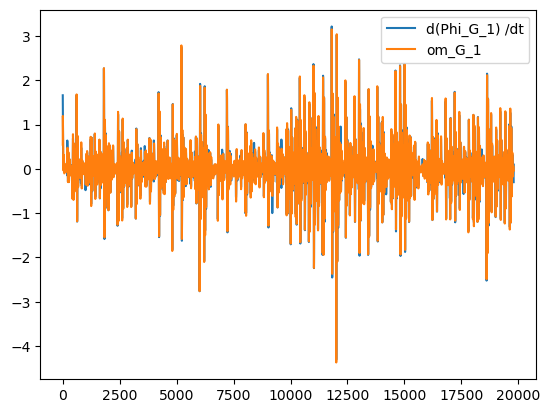

In [82]:
data_matrix_df_smooth_appended[['d(Phi_G_1) /dt', 'om_G_1']].plot()

<Axes: >

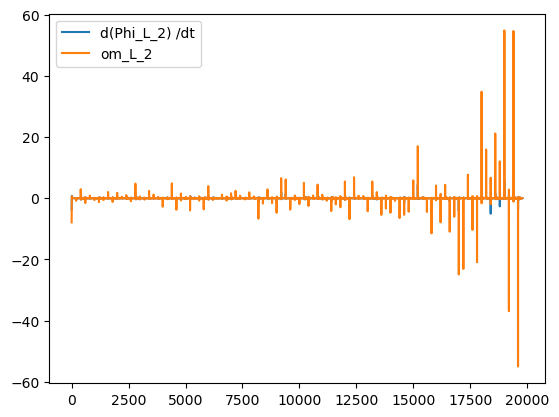

In [83]:
ind = "L_2"
data_matrix_df_smooth_appended[['d(Phi_{}) /dt'.format(ind), 'om_{}'.format(ind)]].plot()


In [84]:
ind = "L_2"


(abs(data_matrix_df_smooth_appended['d(Phi_{}) /dt'.format(ind)] - data_matrix_df_smooth_appended['om_{}'.format(ind)])).sum()


1222.483839916863

In [85]:
abs(data_matrix_df_smooth_appended['d(Phi_{}) /dt'.format(ind)]).sum()

1342.7908077632512

In [86]:
scaled_refined_lib[power_features + freq_features]

,P_G_1,P_G_2,P_G_3,P_G_4,P_G_5,P_G_6,P_G_7,P_G_8,P_G_9,P_G_10,...,om_L_20,om_L_21,om_L_22,om_L_23,om_L_24,om_L_25,om_L_26,om_L_27,om_L_28,om_L_29
0,0.23501063,3.04217837,2.21793895,4.07087636,4.69942189,3.54221249,4.40060539,3.44091693,9.87751693,6.14978523,...,-5.56101436,-7.04660282,-2.98178988,-5.22062865,-7.21513612,-4.02446293,-5.86878995,-6.22769868,-6.77267701,-4.08534016
1,2.52503604,5.60232858,4.65722342,6.04949347,6.58018213,5.38362447,5.95395180,5.80801985,13.09088058,9.17825562,...,-2.50367342,-4.07140660,-1.70161753,-2.98851844,-4.16992687,-2.16505311,-3.32665237,-3.56011093,-3.86209779,-2.29313615
2,3.99663023,7.33834699,6.37408132,7.23477425,7.60010126,6.56173773,6.92185661,7.25866536,15.08719757,10.84002342,...,-1.17474916,-2.21111830,-0.88514922,-1.55681818,-2.29330105,-1.12477510,-1.79152155,-1.96340790,-2.03501619,-1.16948470
3,4.94409116,8.47004441,7.52637183,7.94631989,8.19821277,7.28562964,7.50659270,8.13998201,16.27083729,11.83208764,...,-0.44698176,-1.07041532,-0.38448326,-0.67949236,-1.15186072,-0.51079368,-0.87925302,-0.99648674,-0.93288172,-0.49216744
4,5.55874239,9.18637989,8.27195416,8.36742161,8.55342152,7.71249424,7.84535485,8.66614342,16.93782057,12.43014924,...,0.00028310,-0.38973619,-0.08890521,-0.16294967,-0.46951169,-0.14610636,-0.34636459,-0.41865817,-0.29230145,-0.09936469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19794,6.14769234,9.54161924,8.90383747,9.22674701,8.56032860,7.46517776,8.12646292,8.46891309,17.25744581,12.70555150,...,-0.08004022,0.00010016,0.00024746,0.04222448,0.00859913,0.02226825,-0.00379037,-0.00000132,-0.05175187,-0.04968834
19795,6.12854132,9.51280883,8.98825817,9.20962470,8.52780008,7.41166736,8.20869033,8.55083655,17.21675741,12.64696928,...,-0.07822793,0.00248723,0.00242251,0.04297468,0.00785860,0.02502034,-0.00262614,0.00054930,-0.05122621,-0.04865031
19796,6.10824587,9.48850910,9.06666536,9.18218651,8.50398569,7.36593616,8.28609668,8.64046235,17.17582626,12.58605988,...,-0.07494220,0.00540596,0.00480632,0.04301195,0.00688717,0.02731700,-0.00160204,0.00095218,-0.05025337,-0.04693400
19797,6.08736607,9.46947093,9.13759171,9.14396444,8.48965548,7.32958791,8.35720470,8.73702497,17.13506635,12.52358568,...,-0.07010018,0.00889795,0.00739191,0.04228301,0.00567289,0.02910366,-0.00074164,0.00118928,-0.04881312,-0.04449858


In [87]:
from dae_finder import sequentialThLin, AlgModelFinder
from sklearn.linear_model import LinearRegression

# lin_reg_model = LinearRegression
# lin_reg_model_arg = {"fit_intercept": True}
# seq_th_model = sequentialThLin(custom_model=True,
#                                custom_model_ob = lin_reg_model,
#                                custom_model_arg= lin_reg_model_arg,
#                               coef_threshold=0.1)


ind = "L_2"
seq_th_model = sequentialThLin(model_id="lasso", alpha=0.3, coef_threshold=0.1, fit_intercept=True)
# seq_th_model = sequentialThLin(model_id="RR", alpha=0.3, coef_threshold=0.1, fit_intercept=True)


seq_th_model.fit(X=scaled_refined_lib[power_features + phase_features+ freq_features], y=data_matrix_df_smooth_appended['om_{}'.format(ind)])
seq_th_model.score(X=scaled_refined_lib[power_features + phase_features+freq_features], y=data_matrix_df_smooth_appended['om_{}'.format(ind)])

# seq_th_model.fit(X=scaled_refined_lib[power_features + phase_features+ freq_features], y=data_matrix_df_smooth_appended['d(om_{}) /dt'.format(ind)])
# seq_th_model.score(X=scaled_refined_lib[power_features + phase_features+freq_features], y=data_matrix_df_smooth_appended['d(om_{}) /dt'.format(ind)])

Sequential threshold converged in 1 iterations


0.8895192864296632

In [88]:
coef_dict = dict(zip(seq_th_model.feature_names_in_, seq_th_model.coef_))
coef_dict

{'P_G_1': 0.0,
 'P_G_2': 0.0,
 'P_G_3': 0.0,
 'P_G_4': 0.0,
 'P_G_5': 0.0,
 'P_G_6': 0.0,
 'P_G_7': 0.0,
 'P_G_8': 0.0,
 'P_G_9': 0.0,
 'P_G_10': 0.0,
 'P_T_1': 0.0,
 'P_T_2': 0.0,
 'P_T_3': 0.0,
 'P_T_4': 0.0,
 'P_T_5': 0.0,
 'P_T_6': 0.0,
 'P_T_7': 0.0,
 'P_T_8': 0.0,
 'P_T_9': 0.0,
 'P_T_10': 0.0,
 'P_L_1': 0.0,
 'P_L_2': -0.3953226719488351,
 'P_L_3': 0.0,
 'P_L_4': 0.0,
 'P_L_5': 0.0,
 'P_L_6': 0.0,
 'P_L_7': 0.0,
 'P_L_8': 0.0,
 'P_L_9': 0.0,
 'P_L_10': 0.0,
 'P_L_11': 0.0,
 'P_L_12': 0.0,
 'P_L_13': 0.0,
 'P_L_14': 0.0,
 'P_L_15': 0.0,
 'P_L_16': 0.0,
 'P_L_17': 0.0,
 'P_L_18': 0.0,
 'P_L_19': 0.0,
 'P_L_20': 0.0,
 'P_L_21': 0.0,
 'P_L_22': 0.0,
 'P_L_23': 0.0,
 'P_L_24': 0.0,
 'P_L_25': 0.0,
 'P_L_26': 0.0,
 'P_L_27': 0.0,
 'P_L_28': 0.0,
 'P_L_29': 0.0,
 'Phi_G_1': 0.0,
 'Phi_G_2': 0.0,
 'Phi_G_3': 0.0,
 'Phi_G_4': 0.0,
 'Phi_G_5': 0.0,
 'Phi_G_6': 0.0,
 'Phi_G_7': 0.0,
 'Phi_G_8': 0.0,
 'Phi_G_9': 0.0,
 'Phi_G_10': 0.0,
 'Phi_T_1': 0.0,
 'Phi_T_2': 0.0,
 'Phi_T_3': 0.0,
 'Phi

### Discovering all dynamic equations

- Note that frequencies need to be discovered only for non-generator nodes
- Time derivative of frequencies need to be discovered for generators

In [104]:
#Collecting the feature names to fit: This will be d/dt(omega) for generators and omega for non-generator nodes

d_omega_gen_features = [feat for feat in data_matrix_df_smooth_appended.columns if "d(om_G" in feat]
freq_non_gen_features = [feat for feat in freq_features if "G" not in feat]

dynamic_feat_to_fit = d_omega_gen_features + freq_non_gen_features
dynamic_feat_to_fit

['d(om_G_1) /dt',
 'd(om_G_2) /dt',
 'd(om_G_3) /dt',
 'd(om_G_4) /dt',
 'd(om_G_5) /dt',
 'd(om_G_6) /dt',
 'd(om_G_7) /dt',
 'd(om_G_8) /dt',
 'd(om_G_9) /dt',
 'd(om_G_10) /dt',
 'om_T_1',
 'om_T_2',
 'om_T_3',
 'om_T_4',
 'om_T_5',
 'om_T_6',
 'om_T_7',
 'om_T_8',
 'om_T_9',
 'om_T_10',
 'om_L_1',
 'om_L_2',
 'om_L_3',
 'om_L_4',
 'om_L_5',
 'om_L_6',
 'om_L_7',
 'om_L_8',
 'om_L_9',
 'om_L_10',
 'om_L_11',
 'om_L_12',
 'om_L_13',
 'om_L_14',
 'om_L_15',
 'om_L_16',
 'om_L_17',
 'om_L_18',
 'om_L_19',
 'om_L_20',
 'om_L_21',
 'om_L_22',
 'om_L_23',
 'om_L_24',
 'om_L_25',
 'om_L_26',
 'om_L_27',
 'om_L_28',
 'om_L_29']

In [115]:
combined_features = power_features + phase_features+ freq_features

dynamic_feature_to_libr_map = {feat: [comb_feat for comb_feat in combined_features if feat != comb_feat]
                              for feat in dynamic_feat_to_fit}

In [116]:
scaled_refined_lib[power_features + phase_features+ freq_features]

,P_G_1,P_G_2,P_G_3,P_G_4,P_G_5,P_G_6,P_G_7,P_G_8,P_G_9,P_G_10,...,om_L_20,om_L_21,om_L_22,om_L_23,om_L_24,om_L_25,om_L_26,om_L_27,om_L_28,om_L_29
0,0.23501063,3.04217837,2.21793895,4.07087636,4.69942189,3.54221249,4.40060539,3.44091693,9.87751693,6.14978523,...,-5.56101436,-7.04660282,-2.98178988,-5.22062865,-7.21513612,-4.02446293,-5.86878995,-6.22769868,-6.77267701,-4.08534016
1,2.52503604,5.60232858,4.65722342,6.04949347,6.58018213,5.38362447,5.95395180,5.80801985,13.09088058,9.17825562,...,-2.50367342,-4.07140660,-1.70161753,-2.98851844,-4.16992687,-2.16505311,-3.32665237,-3.56011093,-3.86209779,-2.29313615
2,3.99663023,7.33834699,6.37408132,7.23477425,7.60010126,6.56173773,6.92185661,7.25866536,15.08719757,10.84002342,...,-1.17474916,-2.21111830,-0.88514922,-1.55681818,-2.29330105,-1.12477510,-1.79152155,-1.96340790,-2.03501619,-1.16948470
3,4.94409116,8.47004441,7.52637183,7.94631989,8.19821277,7.28562964,7.50659270,8.13998201,16.27083729,11.83208764,...,-0.44698176,-1.07041532,-0.38448326,-0.67949236,-1.15186072,-0.51079368,-0.87925302,-0.99648674,-0.93288172,-0.49216744
4,5.55874239,9.18637989,8.27195416,8.36742161,8.55342152,7.71249424,7.84535485,8.66614342,16.93782057,12.43014924,...,0.00028310,-0.38973619,-0.08890521,-0.16294967,-0.46951169,-0.14610636,-0.34636459,-0.41865817,-0.29230145,-0.09936469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19794,6.14769234,9.54161924,8.90383747,9.22674701,8.56032860,7.46517776,8.12646292,8.46891309,17.25744581,12.70555150,...,-0.08004022,0.00010016,0.00024746,0.04222448,0.00859913,0.02226825,-0.00379037,-0.00000132,-0.05175187,-0.04968834
19795,6.12854132,9.51280883,8.98825817,9.20962470,8.52780008,7.41166736,8.20869033,8.55083655,17.21675741,12.64696928,...,-0.07822793,0.00248723,0.00242251,0.04297468,0.00785860,0.02502034,-0.00262614,0.00054930,-0.05122621,-0.04865031
19796,6.10824587,9.48850910,9.06666536,9.18218651,8.50398569,7.36593616,8.28609668,8.64046235,17.17582626,12.58605988,...,-0.07494220,0.00540596,0.00480632,0.04301195,0.00688717,0.02731700,-0.00160204,0.00095218,-0.05025337,-0.04693400
19797,6.08736607,9.46947093,9.13759171,9.14396444,8.48965548,7.32958791,8.35720470,8.73702497,17.13506635,12.52358568,...,-0.07010018,0.00889795,0.00739191,0.04228301,0.00567289,0.02910366,-0.00074164,0.00118928,-0.04881312,-0.04449858


In [117]:
data_matrix_df_smooth_appended[d_omega_gen_features]

,d(om_G_1) /dt,d(om_G_2) /dt,d(om_G_3) /dt,d(om_G_4) /dt,d(om_G_5) /dt,d(om_G_6) /dt,d(om_G_7) /dt,d(om_G_8) /dt,d(om_G_9) /dt,d(om_G_10) /dt
0,39.42577564,26.62637512,28.88107272,20.51757119,17.19609766,19.62157117,16.25199904,22.34514919,14.22401976,17.40026046
1,25.32690498,18.35951854,19.91844781,13.49564542,11.49628358,12.83384197,10.94068314,15.25869990,9.66439230,11.20084294
2,14.21896775,11.54301742,12.47834426,7.92247932,6.92697230,7.29341260,6.60838694,9.44465648,5.91777467,6.17358877
3,6.10196394,6.17687176,6.56076207,3.79807289,3.48816381,3.00028307,3.25511043,4.90301892,2.98416688,2.31849796
4,0.97589355,2.26108157,2.16570126,1.12242612,1.17985811,-0.04554663,0.88085361,1.63378723,0.86356893,-0.36442951
...,...,...,...,...,...,...,...,...,...,...
19794,-0.61217102,0.98323361,-1.29329450,-2.91888843,1.99273065,1.65575198,-0.74423087,2.88854017,-0.07148204,-1.25017092
19795,-0.38332975,1.11610588,-1.72787286,-2.75564958,2.09620429,1.98733794,-1.19597098,2.40890587,0.07155494,-0.96620806
19796,-0.11285293,1.23842563,-2.15266763,-2.53408775,2.15326709,2.30958269,-1.64110987,1.86929722,0.22433143,-0.65314592
19797,0.19925943,1.35019286,-2.56767879,-2.25420292,2.16391905,2.62248624,-2.07964754,1.26971420,0.38684743,-0.31098449


In [118]:
refined_candid_lib_appended = pd.concat((scaled_refined_lib, data_matrix_df_smooth_appended[d_omega_gen_features]), axis=1)

refined_candid_lib_appended

,Phi_G_1,Phi_G_2,Phi_G_3,Phi_G_4,Phi_G_5,Phi_G_6,Phi_G_7,Phi_G_8,Phi_G_9,Phi_G_10,...,d(om_G_1) /dt,d(om_G_2) /dt,d(om_G_3) /dt,d(om_G_4) /dt,d(om_G_5) /dt,d(om_G_6) /dt,d(om_G_7) /dt,d(om_G_8) /dt,d(om_G_9) /dt,d(om_G_10) /dt
0,-1.84066873,-0.09396493,0.09150276,0.26821247,-0.14448512,0.96155387,1.50891710,-0.25781679,1.46657002,-3.85779048,...,39.42577564,26.62637512,28.88107272,20.51757119,17.19609766,19.62157117,16.25199904,22.34514919,14.22401976,17.40026046
1,-1.58277010,0.07890796,0.28226548,0.40423256,-0.02888528,1.04316837,1.61680190,-0.08647393,1.56263160,-3.73989034,...,25.32690498,18.35951854,19.91844781,13.49564542,11.49628358,12.83384197,10.94068314,15.25869990,9.66439230,11.20084294
2,-1.34149168,0.24612478,0.46291508,0.53597601,0.08571612,1.12377727,1.72201194,0.07739749,1.65736284,-3.62577407,...,14.21896775,11.54301742,12.47834426,7.92247932,6.92697230,7.29341260,6.60838694,9.44465648,5.91777467,6.17358877
3,-1.11638342,0.40768880,0.63374929,0.66351669,0.19920885,1.20336778,1.82457998,0.23397451,1.75075069,-3.51537591,...,6.10196394,6.17687176,6.56076207,3.79807289,3.48816381,3.00028307,3.25511043,4.90301892,2.98416688,2.31849796
4,-0.90699526,0.56360329,0.79506583,0.78692849,0.31148264,1.28192711,1.92453876,0.38343421,1.84278213,-3.40863010,...,0.97589355,2.26108157,2.16570126,1.12242612,1.17985811,-0.04554663,0.88085361,1.63378723,0.86356893,-0.36442951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19794,0.19479344,1.53164016,1.78344135,2.26028754,1.44315222,2.05806843,2.90235924,1.09443201,2.92380663,-2.35716770,...,-0.61217102,0.98323361,-1.29329450,-2.91888843,1.99273065,1.65575198,-0.74423087,2.88854017,-0.07148204,-1.25017092
19795,0.17359917,1.50408722,1.85190917,2.24182079,1.41598690,2.01546005,2.97227069,1.14883162,2.89322287,-2.40445308,...,-0.38332975,1.11610588,-1.72787286,-2.75564958,2.09620429,1.98733794,-1.19597098,2.40890587,0.07155494,-0.96620806
19796,0.14543714,1.47331725,1.92245054,2.21507531,1.39338802,1.96883576,3.04852800,1.21287478,2.85988950,-2.46118801,...,-0.11285293,1.23842563,-2.15266763,-2.53408775,2.15326709,2.30958269,-1.64110987,1.86929722,0.22433143,-0.65314592
19797,0.10974394,1.43920025,1.99482042,2.17945934,1.37597874,1.91807882,3.13123495,1.28678635,2.82372573,-2.52788181,...,0.19925943,1.35019286,-2.56767879,-2.25420292,2.16391905,2.62248624,-2.07964754,1.26971420,0.38684743,-0.31098449


In [119]:
# #Trying second-order library

# from dae_finder import PolyFeatureMatrix
# poly_degree = 2
# poly_feature_ob = PolyFeatureMatrix(poly_degree)
# combined_features = power_features + phase_features+ freq_features


# scaled_full = poly_feature_ob.fit_transform(scaled_refined_lib[combined_features])
# scaled_full = scaled_full.drop(["1"], axis=1)

# refined_candid_lib_appended = pd.concat((scaled_full, data_matrix_df_smooth_appended[d_omega_gen_features]), axis=1)



# dynamic_feature_to_libr_map = {feat: [comb_feat for comb_feat in scaled_full.columns if feat != comb_feat]
#                               for feat in dynamic_feat_to_fit}

## Checking if doing the dynamic selection without the refinement based on algebraic selection is able to find the correct equations.
- The answer is no. All generator equations are wrong with wrong sin terms entering the equation.  
- Uncomment the block below for checking dynamic model selection with full library. 

In [127]:

# for ind in range(10):
#     dynamic_feature_to_libr_map[list(dynamic_feature_to_libr_map.keys())[ind]] += feature_to_libr_map_constr[list(feature_to_libr_map_constr.keys())[ind]]


# refined_candid_lib_appended = pd.concat((scaled_cand_lib, data_matrix_df_smooth_appended[d_omega_gen_features]), axis=1)

In [123]:
from dae_finder import sequentialThLin, AlgModelFinder
# from sklearn.linear_model import LinearRegression

# lin_reg_model = LinearRegression
# lin_reg_model_arg = {"fit_intercept": True}
# seq_th_model = sequentialThLin(custom_model=True,
#                                custom_model_ob = lin_reg_model,
#                                custom_model_arg= lin_reg_model_arg,
#                               coef_threshold=0.1)
# seq_th_model = sequentialThLin(coef_threshold=0.1, alpha=0.1, fit_intercept=True)
seq_th_model = sequentialThLin(model_id="lasso", alpha=0.3, coef_threshold=0.1, fit_intercept=True)
# seq_th_model = sequentialThLin(model_id="RR", alpha=0.3, coef_threshold=0.2, fit_intercept=True)



dynamic_model_th = AlgModelFinder(custom_model=True, custom_model_ob=seq_th_model)

dynamic_model_th.fit(X=refined_candid_lib_appended,
                     scale_columns=False,
                     features_to_fit=dynamic_feat_to_fit,
                     feature_to_library_map_=dynamic_feature_to_libr_map)

# dynamic_model_th.fit(X=data_matrix_df_smooth_appended,
#                      scale_columns=False,
#                      features_to_fit=dynamic_feat_to_fit,
#                      feature_to_library_map_=dynamic_feature_to_libr_map)

Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations


/opt/anaconda3/envs/pysindy_faster/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.733e+01, tolerance: 5.351e+01
  model = cd_fast.enet_coordinate_descent(


Sequential threshold converged in 2 iterations


/opt/anaconda3/envs/pysindy_faster/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.467e+02, tolerance: 7.129e+01
  model = cd_fast.enet_coordinate_descent(


Sequential threshold converged in 2 iterations


/opt/anaconda3/envs/pysindy_faster/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.170e+02, tolerance: 6.465e+01
  model = cd_fast.enet_coordinate_descent(


Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential th

AlgModelFinder(custom_model=True,
               custom_model_ob=<dae_finder.sequentialThLin object at 0x14ddf31d0>)

In [124]:
dynamic_model_th.best_models()

,d(om_G_1) /dt,d(om_G_6) /dt,d(om_G_7) /dt,d(om_G_3) /dt,d(om_G_8) /dt,d(om_G_4) /dt,d(om_G_5) /dt,d(om_G_2) /dt,d(om_G_10) /dt,d(om_G_9) /dt,...,om_T_10,om_T_9,om_T_8,om_T_7,om_T_4,om_T_6,om_T_3,om_T_2,om_T_5,om_T_1
P_G_1,-1.31418741,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
P_G_2,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-0.86909332,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
P_G_3,0.00000000,0.00000000,0.00000000,-1.17489742,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
P_G_4,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-1.26490070,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
P_G_5,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-1.37463234,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"sin( Phi_G_9-Phi_L_26 -gamma_8,45 )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.46496199,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"sin( Phi_G_9-Phi_L_27 -gamma_8,46 )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"sin( Phi_G_9-Phi_L_28 -gamma_8,47 )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.10596721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"sin( Phi_G_9-Phi_L_29 -gamma_8,48 )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.23414221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
fitted_dynamic_models = dynamic_model_th.best_models()

In [126]:
for ind in range(1,11):
    print(fitted_dynamic_models["d(om_G_{}) /dt".format(ind)][abs(fitted_dynamic_models["d(om_G_{}) /dt".format(ind)]) > 0.1])

P_G_1                                -1.31418741
om_G_1                               -0.99301130
sin( Phi_G_1-Phi_T_1 -gamma_0,10 )   -0.16585750
sin( Phi_G_1-Phi_L_2 -gamma_0,21 )   -5.54216375
sin( Phi_G_1-Phi_L_3 -gamma_0,22 )   -0.34743797
r2- metric                            0.99505638
Name: d(om_G_1) /dt, dtype: float64
P_G_2                                 -0.86909332
om_G_2                                -0.18457795
sin( Phi_G_2-Phi_L_5 -gamma_1,24 )    -1.74487759
sin( Phi_G_2-Phi_L_6 -gamma_1,25 )    -0.69490571
sin( Phi_G_2-Phi_L_7 -gamma_1,26 )    -0.35162783
sin( Phi_G_2-Phi_L_11 -gamma_1,30 )   -0.56362965
sin( Phi_G_2-Phi_L_14 -gamma_1,33 )   -0.21769476
r2- metric                             0.98943052
Name: d(om_G_2) /dt, dtype: float64
P_G_3                                 -1.17489742
om_G_3                                -0.20669432
sin( Phi_G_3-Phi_L_5 -gamma_2,24 )    -0.41530612
sin( Phi_G_3-Phi_L_6 -gamma_2,25 )    -0.17034123
sin( Phi_G_3-Phi_L_10 -gamma_2,29 

In [84]:
for ind in range(1,11):
    print(fitted_dynamic_models["om_T_{}".format(ind)][abs(fitted_dynamic_models["om_T_{}".format(ind)]) > 0.1])

P_T_1        -0.66977826
r2- metric    0.85046987
Name: om_T_1, dtype: float64
P_T_2        -0.67755324
r2- metric    0.86561034
Name: om_T_2, dtype: float64
P_T_3        -0.67927431
r2- metric    0.86897818
Name: om_T_3, dtype: float64
P_T_4        -0.69282644
r2- metric    0.89570434
Name: om_T_4, dtype: float64
P_T_5        -0.67273450
r2- metric    0.85621241
Name: om_T_5, dtype: float64
P_T_6        -0.68260345
r2- metric    0.87550954
Name: om_T_6, dtype: float64
P_T_7        -0.69342125
r2- metric    0.89688577
Name: om_T_7, dtype: float64
P_T_8        -0.69866698
r2- metric    0.90733574
Name: om_T_8, dtype: float64
P_T_9        -0.69902654
r2- metric    0.90805402
Name: om_T_9, dtype: float64
P_T_10       -0.69932366
r2- metric    0.90864779
Name: om_T_10, dtype: float64


In [93]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression(fit_intercept= True)

ind = "2"
lin_model.fit(data_matrix_df_smooth_appended[["P_G_"+ind,"om_G_"+ind, "om_T_"+ind]], data_matrix_df_smooth_appended["d(om_G_{}) /dt".format(ind)])
lin_model.score(data_matrix_df_smooth_appended[["P_G_"+ind,"om_G_"+ind, "om_T_"+ind]], data_matrix_df_smooth_appended["d(om_G_{}) /dt".format(ind)])


0.9984326152713162

In [94]:
dict(zip(lin_model.feature_names_in_, lin_model.coef_))

{'P_G_2': -7.814244061388873,
 'om_G_2': -1.30353576407574,
 'om_T_2': 0.5112914265725719}

In [226]:
for ind in range(1,30):
    print(fitted_dynamic_models["om_L_{}".format(ind)][abs(fitted_dynamic_models["om_L_{}".format(ind)]) > 0.1])

P_L_1        -0.69999372
r2- metric    0.90998744
Name: om_L_1, dtype: float64
P_L_2        -0.69999851
r2- metric    0.90999703
Name: om_L_2, dtype: float64
P_L_3        -0.69999791
r2- metric    0.90999581
Name: om_L_3, dtype: float64
P_L_4        -0.69999721
r2- metric    0.90999442
Name: om_L_4, dtype: float64
P_L_5        -0.69999142
r2- metric    0.90998284
Name: om_L_5, dtype: float64
P_L_6        -0.69999652
r2- metric    0.90999303
Name: om_L_6, dtype: float64
P_L_7        -0.69999791
r2- metric    0.90999582
Name: om_L_7, dtype: float64
P_L_8        -0.69999599
r2- metric    0.90999197
Name: om_L_8, dtype: float64
P_L_9        -0.69999484
r2- metric    0.90998967
Name: om_L_9, dtype: float64
P_L_10       -0.69999873
r2- metric    0.90999747
Name: om_L_10, dtype: float64
P_L_11       -0.69999874
r2- metric    0.90999749
Name: om_L_11, dtype: float64
P_L_12       -0.69999539
r2- metric    0.90999078
Name: om_L_12, dtype: float64
P_L_13       -0.69999018
r2- metric    0.90998036

In [168]:
data_matrix_df_smooth_appended['d(om_{}) /dt'.format(ind)].describe()

In [151]:
from dae_finder import sequentialThLin, AlgModelFinder
from sklearn.linear_model import LinearRegression

# lin_reg_model = LinearRegression
# lin_reg_model_arg = {"fit_intercept": True}
# seq_th_model = sequentialThLin(custom_model=True,
#                                custom_model_ob = lin_reg_model,
#                                custom_model_arg= lin_reg_model_arg,
#                               coef_threshold=0.1)


ind = "G_3"
seq_th_model = sequentialThLin(model_id="lasso", alpha=0.3, coef_threshold=0.1, fit_intercept=True)
# seq_th_model = sequentialThLin(model_id="RR", alpha=0.3, coef_threshold=0.1, fit_intercept=True)


# seq_th_model.fit(X=scaled_refined_lib[power_features + phase_features+ freq_features], y=data_matrix_df_smooth_appended['om_{}'.format(ind)])
# seq_th_model.score(X=scaled_refined_lib[power_features + phase_features+freq_features], y=data_matrix_df_smooth_appended['om_{}'.format(ind)])

seq_th_model.fit(X=scaled_refined_lib[power_features + phase_features+ freq_features], y=data_matrix_df_smooth_appended['d(om_{}) /dt'.format(ind)])
seq_th_model.score(X=scaled_refined_lib[power_features + phase_features+freq_features], y=data_matrix_df_smooth_appended['d(om_{}) /dt'.format(ind)])

In [152]:
coef_dict = dict(zip(seq_th_model.feature_names_in_, seq_th_model.coef_))
coef_dict

In [253]:
seq_th_model.intercept_

In [231]:
non_zero_feat = [feat for feat, coef in coef_dict.items() if abs(coef) > 0.01]
non_zero_feat

In [232]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X=scaled_refined_lib[non_zero_feat], y=data_matrix_df_smooth_appended['d(om_{}) /dt'.format(ind)])
lin_model.score(X=scaled_refined_lib[non_zero_feat], y=data_matrix_df_smooth_appended['d(om_{}) /dt'.format(ind)])

In [233]:
dict(zip(lin_model.feature_names_in_, lin_model.coef_))

In [234]:
scaled_refined_lib[non_zero_feat]

In [244]:
from sklearn import decomposition
pca_1 = decomposition.PCA()

refined_features = ["Phi_{}".format(ind), "P_{}".format(ind), "om_{}".format(ind)]
pca_1.fit(scaled_refined_lib[refined_features])

var_expl_ratio = pca_1.explained_variance_ratio_
var_expl_ratio

In [245]:
pca_1.components_

In [246]:
scaled_refined_lib[refined_features].corr()

In [243]:
scaled_refined_lib[]

In [224]:
from numpy import linalg

In [225]:
linalg.cond(scaled_refined_lib[non_zero_feat])

In [247]:
linalg.cond(sin_diff_library)

In [248]:
feature_to_libr_map

### Full candidate library is unable to find the model 

In [62]:
seq_th_model.fit(X=scaled_cand_lib, y=data_matrix_df_smooth_appended['d(om_0) /dt'])
seq_th_model.score(X=scaled_cand_lib, y=data_matrix_df_smooth_appended['d(om_0) /dt'])

In [63]:
dict(zip(seq_th_model.feature_names_in_, seq_th_model.coef_))